In [746]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


### Importing packages needed

In [747]:
import pandas as pd 
import numpy as np

### Importing the data

In [748]:
path = "/content/drive/MyDrive/Omdela/port_harcourt__nigeria__4.80678_7.002953_.csv"
NewTSA = pd.read_csv(path, parse_dates=['created_at'])
NewTSA.rename(columns={'PM2.5_ATM_ug/m3':'pm', 'entry_id':'entryId', 'created_at':'createdAt', 'Temperature_F':'Temperature', 'Humidity_%':'Humidity'}, inplace=True)
NewTSA.set_index('createdAt', inplace=True)

In [749]:
NewTSA.head()

,entryId,Temperature,Humidity,pm
createdAt,,,,
2021-07-26 16:45:59+00:00,198,89,50,40.78
2021-07-26 16:48:03+00:00,199,89,50,40.09
2021-07-26 16:49:59+00:00,200,89,50,37.93
2021-07-26 16:54:03+00:00,201,89,50,33.18
2021-07-26 16:55:59+00:00,202,89,50,37.84


In [750]:
NewTSA.describe()

,entryId,Temperature,Humidity,pm
count,56052.000000,56052.000000,56052.000000,56052.000000
mean,28223.500000,84.821469,65.117766,54.391926
std,16180.962981,4.319505,8.550730,42.205997
min,198.000000,70.000000,29.000000,0.780000
25%,14210.750000,82.000000,61.000000,30.170000
50%,28223.500000,84.000000,68.000000,41.450000
75%,42236.250000,87.000000,71.000000,61.190000
max,56249.000000,108.000000,89.000000,568.080000


In [751]:
NewTSA

,entryId,Temperature,Humidity,pm
createdAt,,,,
2021-07-26 16:45:59+00:00,198,89,50,40.78
2021-07-26 16:48:03+00:00,199,89,50,40.09
2021-07-26 16:49:59+00:00,200,89,50,37.93
2021-07-26 16:54:03+00:00,201,89,50,33.18
2021-07-26 16:55:59+00:00,202,89,50,37.84
...,...,...,...,...
2021-10-25 09:28:43+00:00,56245,87,61,29.17
2021-10-25 09:30:43+00:00,56246,87,61,29.57
2021-10-25 09:32:44+00:00,56247,87,61,28.75


### setting frequency

In [752]:
#NewTSA = NewTSA.asfreq('b')

In [753]:
#NewTSA.head()

### Taking care of missing values

In [754]:
#NewTSA.isna()

In [755]:
#NewTSA.isna().sum()

In [756]:
#NewTSA.entry_id = NewTSA.entry_id.fillna(method = 'ffill')
#NewTSA.isna().sum()

In [757]:
#NewTSA.Temperature_F = NewTSA.Temperature_F.fillna(method = 'ffill')
#NewTSA.isna().sum()

In [758]:
#NewTSA.Humidity = NewTSA.Humidity.fillna(value = NewTSA.Humidity.mean())
#NewTSA.isna().sum()

In [759]:
#NewTSA.PM = NewTSA.PM.fillna(method = 'bfill')
#NewTSA.isna().sum()

### Simplifying the dataset

In [760]:
NewTSA['PM2'] = NewTSA.pm

In [761]:
NewTSA.describe()

,entryId,Temperature,Humidity,pm,PM2
count,56052.000000,56052.000000,56052.000000,56052.000000,56052.000000
mean,28223.500000,84.821469,65.117766,54.391926,54.391926
std,16180.962981,4.319505,8.550730,42.205997,42.205997
min,198.000000,70.000000,29.000000,0.780000,0.780000
25%,14210.750000,82.000000,61.000000,30.170000,30.170000
50%,28223.500000,84.000000,68.000000,41.450000,41.450000
75%,42236.250000,87.000000,71.000000,61.190000,61.190000
max,56249.000000,108.000000,89.000000,568.080000,568.080000


In [762]:
#del NewTSA['entry_id'], NewTSA['Temperature'], NewTSA['Humidity']

In [763]:
#NewTSA.describe()

Creating Returns

In [764]:
NewTSA['ret_entryId'] = NewTSA.entryId


### Splitting the data

In [765]:
size = int(len(NewTSA)*0.8)

In [766]:
df = NewTSA.iloc[:size]

In [767]:
df_test = NewTSA.iloc[size:]

In [768]:
df.tail()

,entryId,Temperature,Humidity,pm,PM2,ret_entryId
createdAt,,,,,,
2021-10-04 17:20:46+00:00,45034,87,63,28.87,28.87,45034
2021-10-04 17:22:47+00:00,45035,86,64,36.02,36.02,45035
2021-10-04 17:24:47+00:00,45036,86,63,45.31,45.31,45036
2021-10-04 17:26:47+00:00,45037,86,64,47.24,47.24,45037
2021-10-04 17:28:48+00:00,45038,86,64,50.26,50.26,45038


In [769]:
df_test.head()

,entryId,Temperature,Humidity,pm,PM2,ret_entryId
createdAt,,,,,,
2021-10-04 17:31:02+00:00,45039,86,63,54.93,54.93,45039
2021-10-04 17:32:47+00:00,45040,86,64,43.19,43.19,45040
2021-10-04 17:34:47+00:00,45041,86,64,42.59,42.59,45041
2021-10-04 17:36:47+00:00,45042,86,64,42.42,42.42,45042
2021-10-04 17:38:47+00:00,45043,86,64,39.33,39.33,45043


### White Noise

In [770]:
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa import api as sts
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()

In [771]:
wn = np.random.normal(loc = df.PM2.mean(), scale = df.PM2.std(), size = len(df))

In [772]:
df['wn'] = wn

In [773]:
df.describe()

,entryId,Temperature,Humidity,pm,PM2,ret_entryId,wn
count,44841.000000,44841.000000,44841.000000,44841.000000,44841.000000,44841.000000,44841.000000
mean,22618.000000,84.644410,65.192502,52.919359,52.919359,22618.000000,52.919581
std,12944.626047,4.169328,8.472612,40.857128,40.857128,12944.626047,40.846077
min,198.000000,70.000000,29.000000,0.780000,0.780000,198.000000,-106.344327
25%,11408.000000,82.000000,61.000000,30.380000,30.380000,11408.000000,25.500080
50%,22618.000000,84.000000,68.000000,41.140000,41.140000,22618.000000,52.750713
75%,33828.000000,87.000000,71.000000,58.240000,58.240000,33828.000000,80.354791
max,45038.000000,108.000000,89.000000,568.080000,568.080000,45038.000000,293.005549


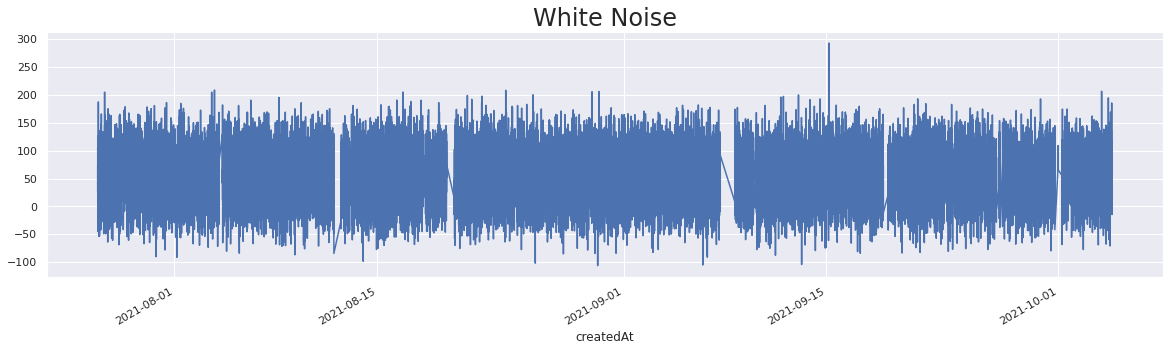

In [774]:
df.wn.plot(figsize = (20,5))
plt.title('White Noise', size = 24)
plt.show()

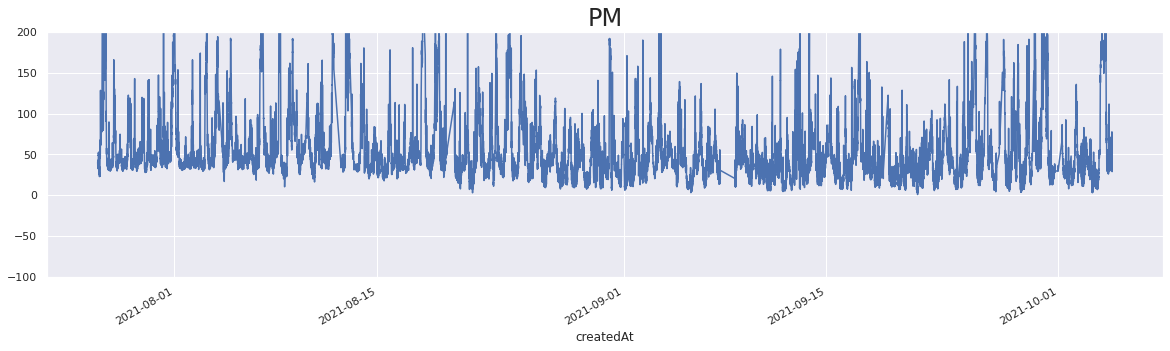

In [775]:
df.PM2.plot(figsize = (20,5))
plt.title('PM', size = 24)
plt.ylim(-100, 200)
plt.show()

### Stationary

In [776]:
sts.adfuller(df.PM2)

(-14.447074480720396,
 7.200069869102596e-27,
 56,
 44784,
 {'1%': -3.430496027037803,
  '10%': -2.5668043529547,
  '5%': -2.8616045407860544},
 316954.57304107305)

In [777]:
sts.adfuller(df.wn)

(-151.4352458711321,
 0.0,
 1,
 44839,
 {'1%': -3.430495847909211,
  '10%': -2.5668043108152805,
  '5%': -2.8616044616170444},
 459375.8557043189)

### Seasonality

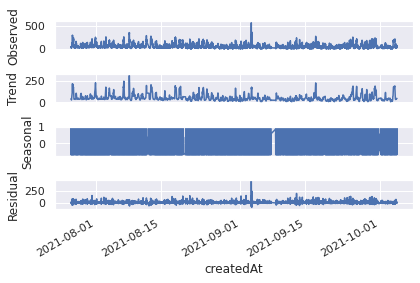

In [778]:
s_dec_additive = seasonal_decompose(df.PM2, model = 'additive', freq=50)
s_dec_additive.plot()
plt.show()

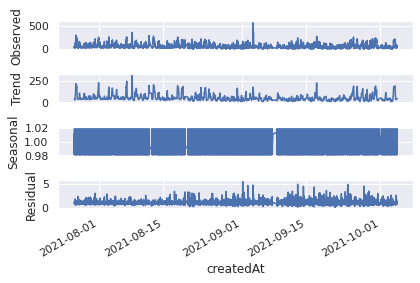

In [779]:
s_dec_multiplicative = seasonal_decompose(df.PM2, model = 'multiplicative', freq=50)
s_dec_multiplicative.plot()
plt.show()

### ACF

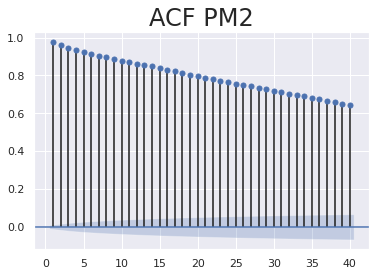

In [780]:
sgt.plot_acf(df.PM2, lags = 40, zero = False)
plt.title('ACF PM2', size = 24)
plt.show()

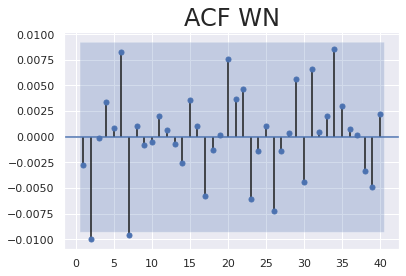

In [781]:
sgt.plot_acf(df.wn, lags = 40, zero = False)
plt.title('ACF WN', size = 24)
plt.show()

### PACF

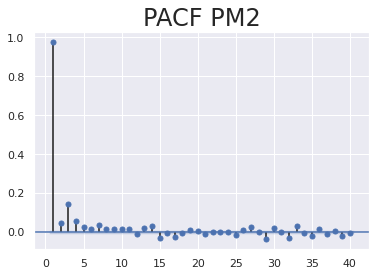

In [782]:
sgt.plot_pacf(df.PM2, lags = 40, zero = False, method=('ols'))
plt.title('PACF PM2', size = 24)
plt.show()

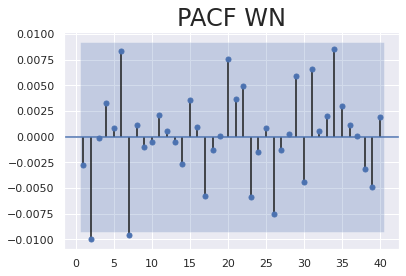

In [783]:
sgt.plot_pacf(df.wn, lags = 40, zero = False, method=('ols'))
plt.title('PACF WN', size = 24)
plt.show()

### AR(1) Model

In [784]:
import statsmodels
statsmodels.__version__
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2
model_ar = ARMA(df.PM2, order = (1,0))

In [785]:
result_ar = model_ar.fit()

In [786]:
result_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                    PM2   No. Observations:                44841
Model:                     ARMA(1, 0)   Log Likelihood             -159562.428
Method:                       css-mle   S.D. of innovations              8.495
Date:                Wed, 24 Nov 2021   AIC                         319130.856
Time:                        00:44:53   BIC                         319156.989
Sample:                             0   HQIC                        319139.084
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         52.8959      1.832     28.871      0.000      49.305      56.487
ar.L1.PM2      0.9781      0.001    996.714      0.000       0.976       0.980
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0224           +0.0000j            1.0224            0.0000
-----------------------------------------------------------------------------
"""

### Higher-Lag AR Models

In [787]:
model_ar_2 = ARMA(df.PM2, order = (2,0))
result_ar_2 = model_ar_2.fit()

In [788]:
result_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                    PM2   No. Observations:                44841
Model:                     ARMA(2, 0)   Log Likelihood             -159510.425
Method:                       css-mle   S.D. of innovations              8.485
Date:                Wed, 24 Nov 2021   AIC                         319028.850
Time:                        00:44:55   BIC                         319063.693
Sample:                             0   HQIC                        319039.820
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         52.9194      1.922     27.531      0.000      49.152      56.687
ar.L1.PM2      0.9310      0.005    197.388      0.000       0.922       0.940
ar.L2.PM2      0.0481      0.005     10.204      0.000       0.039       0.057
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0202           +0.0000j            1.0202            0.0000
AR.2          -20.3640           +0.0000j           20.3640            0.5000
-----------------------------------------------------------------------------
"""

In [789]:
model_ar_3 = ARMA(df.PM2, order = (3,0))
result_ar_3 = model_ar_3.fit()
result_ar_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                    PM2   No. Observations:                44841
Model:                     ARMA(3, 0)   Log Likelihood             -159040.716
Method:                       css-mle   S.D. of innovations              8.396
Date:                Wed, 24 Nov 2021   AIC                         318091.433
Time:                        00:44:59   BIC                         318134.987
Sample:                             0   HQIC                        318105.145
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         52.9194      2.220     23.833      0.000      48.567      57.271
ar.L1.PM2      0.9241      0.005    197.752      0.000       0.915       0.933
ar.L2.PM2     -0.0859      0.006    -13.466      0.000      -0.098      -0.073
ar.L3.PM2      0.1440      0.005     30.811      0.000       0.135       0.153
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0150           -0.0000j            1.0150           -0.0000
AR.2           -0.2091           -2.6075j            2.6159           -0.2627
AR.3           -0.2091           +2.6075j            2.6159            0.2627
-----------------------------------------------------------------------------
"""

In [790]:
model_ar_4 = ARMA(df.PM2, order = (4,0))
result_ar_4 = model_ar_4.fit()
result_ar_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                    PM2   No. Observations:                44841
Model:                     ARMA(4, 0)   Log Likelihood             -158965.124
Method:                       css-mle   S.D. of innovations              8.382
Date:                Wed, 24 Nov 2021   AIC                         317942.248
Time:                        00:45:08   BIC                         317994.513
Sample:                             0   HQIC                        317958.703
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         52.8981      2.352     22.486      0.000      48.287      57.509
ar.L1.PM2      0.9158      0.005    194.249      0.000       0.907       0.925
ar.L2.PM2     -0.0809      0.006    -12.681      0.000      -0.093      -0.068
ar.L3.PM2      0.0904      0.006     14.157      0.000       0.078       0.103
ar.L4.PM2      0.0580      0.005     12.306      0.000       0.049       0.067
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0133           -0.0000j            1.0133           -0.0000
AR.2            0.4985           -2.1258j            2.1835           -0.2133
AR.3            0.4985           +2.1258j            2.1835            0.2133
AR.4           -3.5680           -0.0000j            3.5680           -0.5000
-----------------------------------------------------------------------------
"""

### LLR Test

In [791]:
def LLR_test(mod_1, mod_2, DF=1):
    L1 = mod_1.llf
    L2 = mod_2.llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

### Comparing Higher-Lag AR Models

In [792]:
LLR_test(result_ar_2, result_ar_3)

0.0

In [793]:
LLR_test(result_ar_3, result_ar_4)

0.0

In [794]:
model_ar_4 = ARMA(df.PM2, order = [4,0])
result_ar_4 = model_ar_4.fit()
print(result_ar_4.summary())
print('LLR_test: ' + str(LLR_test(result_ar_3, result_ar_4)))

                              ARMA Model Results                              
Dep. Variable:                    PM2   No. Observations:                44841
Model:                     ARMA(4, 0)   Log Likelihood             -158965.124
Method:                       css-mle   S.D. of innovations              8.382
Date:                Wed, 24 Nov 2021   AIC                         317942.248
Time:                        00:45:18   BIC                         317994.513
Sample:                             0   HQIC                        317958.703
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         52.8981      2.352     22.486      0.000      48.287      57.509
ar.L1.PM2      0.9158      0.005    194.249      0.000       0.907       0.925
ar.L2.PM2     -0.0809      0.006    -12.681      0.0

In [795]:
model_ar_5 = ARMA(df.PM2, order = [5,0])
result_ar_5 = model_ar_5.fit()
print(result_ar_5.summary())
print('\nLLR test p-value = ' + str(LLR_test(result_ar_4, result_ar_5)))

                              ARMA Model Results                              
Dep. Variable:                    PM2   No. Observations:                44841
Model:                     ARMA(5, 0)   Log Likelihood             -158949.880
Method:                       css-mle   S.D. of innovations              8.379
Date:                Wed, 24 Nov 2021   AIC                         317913.760
Time:                        00:45:27   BIC                         317974.736
Sample:                             0   HQIC                        317932.957
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         52.9194      2.414     21.920      0.000      48.188      57.651
ar.L1.PM2      0.9142      0.005    193.667      0.000       0.905       0.923
ar.L2.PM2     -0.0833      0.006    -13.025      0.0

In [796]:
model_ar_6 = ARMA(df.PM2, order = [6,0])
result_ar_6 = model_ar_6.fit()
print(result_ar_6.summary())
print('\nLLR test p-value = ' + str(LLR_test(result_ar_5, result_ar_6)))

                              ARMA Model Results                              
Dep. Variable:                    PM2   No. Observations:                44841
Model:                     ARMA(6, 0)   Log Likelihood             -158943.378
Method:                       css-mle   S.D. of innovations              8.378
Date:                Wed, 24 Nov 2021   AIC                         317902.756
Time:                        00:45:41   BIC                         317972.443
Sample:                             0   HQIC                        317924.696
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         52.9194      2.455     21.553      0.000      48.107      57.732
ar.L1.PM2      0.9138      0.005    193.535      0.000       0.905       0.923
ar.L2.PM2     -0.0839      0.006    -13.114      0.0

In [797]:
model_ar_7 = ARMA(df.PM2, order = [7,0])
result_ar_7 = model_ar_7.fit()
print(result_ar_7.summary())
print('\nLLR test p-value = ' + str(LLR_test(result_ar_6, result_ar_7)))

                              ARMA Model Results                              
Dep. Variable:                    PM2   No. Observations:                44841
Model:                     ARMA(7, 0)   Log Likelihood             -158914.571
Method:                       css-mle   S.D. of innovations              8.373
Date:                Wed, 24 Nov 2021   AIC                         317847.142
Time:                        00:45:59   BIC                         317925.540
Sample:                             0   HQIC                        317871.825
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         52.9194      2.544     20.799      0.000      47.933      57.906
ar.L1.PM2      0.9132      0.005    193.502      0.000       0.904       0.922
ar.L2.PM2     -0.0843      0.006    -13.181      0.0

In [798]:
print('LLR_test: ' + str(LLR_test(result_ar, result_ar_7, DF=6)))

LLR_test: 0.0


### The DF-Test

In [799]:
sts.adfuller(df.PM2)

(-14.447074480720396,
 7.200069869102596e-27,
 56,
 44784,
 {'1%': -3.430496027037803,
  '10%': -2.5668043529547,
  '5%': -2.8616045407860544},
 316954.57304107305)

### Using Returns

In [800]:
df['returns'] = df.PM2.pct_change(1).mul(100)
df = df.iloc[1:]

In [801]:
sts.adfuller(df.returns)

(-21.85684447239944,
 0.0,
 54,
 44785,
 {'1%': -3.430496023776992,
  '10%': -2.566804352187605,
  '5%': -2.8616045393448823},
 392405.3942196833)

### ACF and PACF Returns

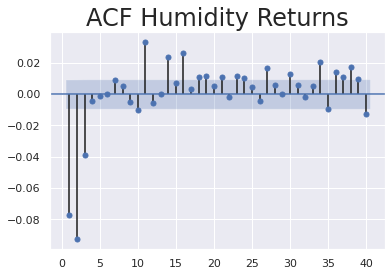

In [802]:
sgt.plot_acf(df.returns, lags=40, zero=False)
plt.title('ACF Humidity Returns', size=24)
plt.show()

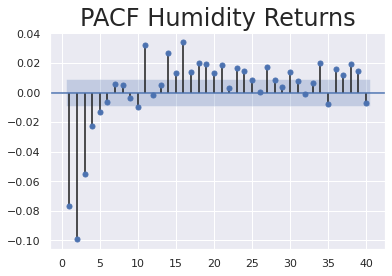

In [803]:
sgt.plot_pacf(df.returns, lags=40, zero=False, method=('ols'))
plt.title('PACF Humidity Returns', size=24)
plt.show()

### AR(1) for Returns 

In [804]:
model_ret_ar_1 = ARMA(df.returns, order =(1,0))
results_ret_ar_1 = model_ret_ar_1.fit()
results_ret_ar_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                44840
Model:                     ARMA(1, 0)   Log Likelihood             -196887.924
Method:                       css-mle   S.D. of innovations             19.530
Date:                Wed, 24 Nov 2021   AIC                         393781.849
Time:                        00:46:24   BIC                         393807.981
Sample:                             0   HQIC                        393790.076
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.3860      0.086     16.185      0.000       1.218       1.554
ar.L1.returns    -0.0770      0.005    -16.351      0.000      -0.086      -0.068
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -12.9890           +0.0000j           12.9890            0.5000
-----------------------------------------------------------------------------
"""

### Higher-Lag AR Models for Returns

In [805]:
model_ret_ar_2 = ARMA(df.returns, order =(2,0))
results_ret_ar_2 = model_ret_ar_2.fit()
results_ret_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                44840
Model:                     ARMA(2, 0)   Log Likelihood             -196665.468
Method:                       css-mle   S.D. of innovations             19.434
Date:                Wed, 24 Nov 2021   AIC                         393338.935
Time:                        00:46:25   BIC                         393373.779
Sample:                             0   HQIC                        393349.905
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.3861      0.078     17.882      0.000       1.234       1.538
ar.L1.returns    -0.0846      0.005    -18.012      0.000      -0.094      -0.075
ar.L2.returns    -0.0994      0.005    -21.145      0.000      -0.109      -0.090
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.4259           -3.1437j            3.1724           -0.2714
AR.2           -0.4259           +3.1437j            3.1724            0.2714
-----------------------------------------------------------------------------
"""

In [806]:
LLR_test(results_ret_ar_1, results_ret_ar_2)

0.0

In [807]:
model_ret_ar_3 = ARMA(df.returns, order =(3,0))
results_ret_ar_3 = model_ret_ar_3.fit()
results_ret_ar_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                44840
Model:                     ARMA(3, 0)   Log Likelihood             -196596.531
Method:                       css-mle   S.D. of innovations             19.404
Date:                Wed, 24 Nov 2021   AIC                         393203.062
Time:                        00:46:27   BIC                         393246.616
Sample:                             0   HQIC                        393216.775
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.3860      0.073     18.901      0.000       1.242       1.530
ar.L1.returns    -0.0901      0.005    -19.118      0.000      -0.099      -0.081
ar.L2.returns    -0.1041      0.005    -22.098      0.000      -0.113      -0.095
ar.L3.returns    -0.0554      0.005    -11.751      0.000      -0.065      -0.046
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.6437           -2.2995j            2.3878           -0.2066
AR.2            0.6437           +2.2995j            2.3878            0.2066
AR.3           -3.1653           -0.0000j            3.1653           -0.5000
-----------------------------------------------------------------------------
"""

In [808]:
LLR_test(results_ret_ar_2, results_ret_ar_3)

0.0

In [809]:
model_ret_ar_3 = ARMA(df.returns, order =(3,0))
results_ret_ar_3 = model_ret_ar_3.fit()
results_ret_ar_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                44840
Model:                     ARMA(3, 0)   Log Likelihood             -196596.531
Method:                       css-mle   S.D. of innovations             19.404
Date:                Wed, 24 Nov 2021   AIC                         393203.062
Time:                        00:46:29   BIC                         393246.616
Sample:                             0   HQIC                        393216.775
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.3860      0.073     18.901      0.000       1.242       1.530
ar.L1.returns    -0.0901      0.005    -19.118      0.000      -0.099      -0.081
ar.L2.returns    -0.1041      0.005    -22.098      0.000      -0.113      -0.095
ar.L3.returns    -0.0554      0.005    -11.751      0.000      -0.065      -0.046
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.6437           -2.2995j            2.3878           -0.2066
AR.2            0.6437           +2.2995j            2.3878            0.2066
AR.3           -3.1653           -0.0000j            3.1653           -0.5000
-----------------------------------------------------------------------------
"""

In [810]:
model_ret_ar_4 = ARMA(df.returns, order =(4,0))
results_ret_ar_4 = model_ret_ar_4.fit()
print(results_ret_ar_4.summary())
print('LLR test: ' + str(LLR_test(results_ret_ar_3, results_ret_ar_4)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                44840
Model:                     ARMA(4, 0)   Log Likelihood             -196585.237
Method:                       css-mle   S.D. of innovations             19.399
Date:                Wed, 24 Nov 2021   AIC                         393182.473
Time:                        00:46:32   BIC                         393234.739
Sample:                             0   HQIC                        393198.929
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.3860      0.072     19.330      0.000       1.245       1.527
ar.L1.returns    -0.0914      0.005    -19.357      0.000      -0.101      -0.082
ar.L2.returns    -0.1064      0.005    -

In [811]:
model_ret_ar_5 = ARMA(df.returns, order =(5,0))
results_ret_ar_5 = model_ret_ar_5.fit()
print(results_ret_ar_5.summary())
print('LLR test: ' + str(LLR_test(results_ret_ar_4, results_ret_ar_5)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                44840
Model:                     ARMA(5, 0)   Log Likelihood             -196581.233
Method:                       css-mle   S.D. of innovations             19.397
Date:                Wed, 24 Nov 2021   AIC                         393176.467
Time:                        00:46:35   BIC                         393237.443
Sample:                             0   HQIC                        393195.665
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.3860      0.071     19.590      0.000       1.247       1.525
ar.L1.returns    -0.0917      0.005    -19.417      0.000      -0.101      -0.082
ar.L2.returns    -0.1072      0.005    -

In [812]:
model_ret_ar_6 = ARMA(df.returns, order =(6,0))
results_ret_ar_6 = model_ret_ar_6.fit()
print(results_ret_ar_6.summary())
print('LLR test: ' + str(LLR_test(results_ret_ar_5, results_ret_ar_6)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                44840
Model:                     ARMA(6, 0)   Log Likelihood             -196580.280
Method:                       css-mle   S.D. of innovations             19.397
Date:                Wed, 24 Nov 2021   AIC                         393176.560
Time:                        00:46:41   BIC                         393246.247
Sample:                             0   HQIC                        393198.500
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.3860      0.070     19.718      0.000       1.248       1.524
ar.L1.returns    -0.0918      0.005    -19.434      0.000      -0.101      -0.083
ar.L2.returns    -0.1073      0.005    -

In [813]:
model_ret_ar_7 = ARMA(df.returns, order =(7,0))
results_ret_ar_7 = model_ret_ar_7.fit()
print(results_ret_ar_7.summary())
print('LLR test: ' + str(LLR_test(results_ret_ar_6, results_ret_ar_7)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                44840
Model:                     ARMA(7, 0)   Log Likelihood             -196579.580
Method:                       css-mle   S.D. of innovations             19.396
Date:                Wed, 24 Nov 2021   AIC                         393177.161
Time:                        00:46:48   BIC                         393255.558
Sample:                             0   HQIC                        393201.843
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.3860      0.071     19.609      0.000       1.247       1.525
ar.L1.returns    -0.0917      0.005    -19.427      0.000      -0.101      -0.082
ar.L2.returns    -0.1072      0.005    -

### Normalizing Values

In [814]:
benchmark = df.PM2.iloc[0]
df['norm'] = df.PM2.div(benchmark).mul(100)
sts.adfuller(df.norm)

(-14.447895658810648,
 7.178762316912595e-27,
 56,
 44783,
 {'1%': -3.4304960302987593,
  '10%': -2.5668043537218295,
  '5%': -2.8616045422272913},
 398815.3698280621)

In [815]:
bech_ret = df.returns.iloc[0]
df['norm_ret'] = df.returns.div(bech_ret).mul(100)
sts.adfuller(df.norm_ret)

(-21.85684447239979,
 0.0,
 54,
 44785,
 {'1%': -3.430496023776992,
  '10%': -2.566804352187605,
  '5%': -2.8616045393448823},
 757767.987544229)

### Normalizing Returns

In [816]:
model_norm_ret_ar_1 = ARMA(df.norm_ret, order=(1,0))
results_norm_ret_ar_1 = model_norm_ret_ar_1.fit()
results_norm_ret_ar_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                44840
Model:                     ARMA(1, 0)   Log Likelihood             -379801.739
Method:                       css-mle   S.D. of innovations           1154.262
Date:                Wed, 24 Nov 2021   AIC                         759609.477
Time:                        00:47:07   BIC                         759635.610
Sample:                             0   HQIC                        759617.705
                                                                              
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -81.9170      5.061    -16.185      0.000     -91.837     -71.997
ar.L1.norm_ret    -0.0770      0.005    -16.351      0.000      -0.086      -0.068
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -12.9890           +0.0000j           12.9890            0.5000
-----------------------------------------------------------------------------
"""

In [817]:
model_norm_ret_ar_7 = ARMA(df.norm_ret, order=(7,0))
results_norm_ret_ar_7 = model_norm_ret_ar_7.fit()
results_norm_ret_ar_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                44840
Model:                     ARMA(7, 0)   Log Likelihood             -379493.395
Method:                       css-mle   S.D. of innovations           1146.351
Date:                Wed, 24 Nov 2021   AIC                         759004.789
Time:                        00:47:11   BIC                         759083.187
Sample:                             0   HQIC                        759029.472
                                                                              
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -81.9170      4.178    -19.609      0.000     -90.105     -73.729
ar.L1.norm_ret    -0.0917      0.005    -19.427      0.000      -0.101      -0.082
ar.L2.norm_ret    -0.1072      0.005    -22.613      0.000      -0.117      -0.098
ar.L3.norm_ret    -0.0591      0.005    -12.394      0.000      -0.068      -0.050
ar.L4.norm_ret    -0.0240      0.005     -5.032      0.000      -0.033      -0.015
ar.L5.norm_ret    -0.0134      0.005     -2.802      0.005      -0.023      -0.004
ar.L6.norm_ret    -0.0060      0.005     -1.267      0.205      -0.015       0.003
ar.L7.norm_ret     0.0056      0.005      1.183      0.237      -0.004       0.015
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.8344           -0.8844j            2.0365           -0.4285
AR.2           -1.8344           +0.8844j            2.0365            0.4285
AR.3           -0.3573           -1.9350j            1.9677           -0.2791
AR.4           -0.3573           +1.9350j            1.9677            0.2791
AR.5            1.1763           -1.4849j            1.8944           -0.1434
AR.6            1.1763           +1.4849j            1.8944            0.1434
AR.7            3.1063           -0.0000j            3.1063           -0.0000
-----------------------------------------------------------------------------
"""

### Analysing the Residuals

In [818]:
df['res_changes'] = result_ar_7.resid

In [819]:
df.res_changes.mean()

0.00020687810797896856

In [820]:
df.res_changes.var()

70.10592694537304

In [821]:
sts.adfuller(df.res_changes)

(-26.578919647756432,
 0.0,
 55,
 44784,
 {'1%': -3.430496027037803,
  '10%': -2.5668043529547,
  '5%': -2.8616045407860544},
 316949.2180272004)

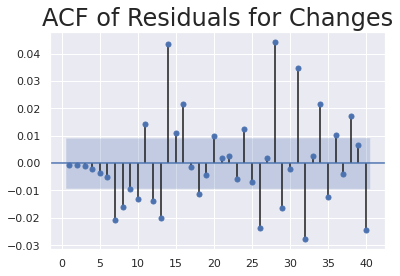

In [822]:
sgt.plot_acf(df.res_changes, zero=False, lags=40)
plt.title('ACF of Residuals for Changes', size=24)
plt.show()

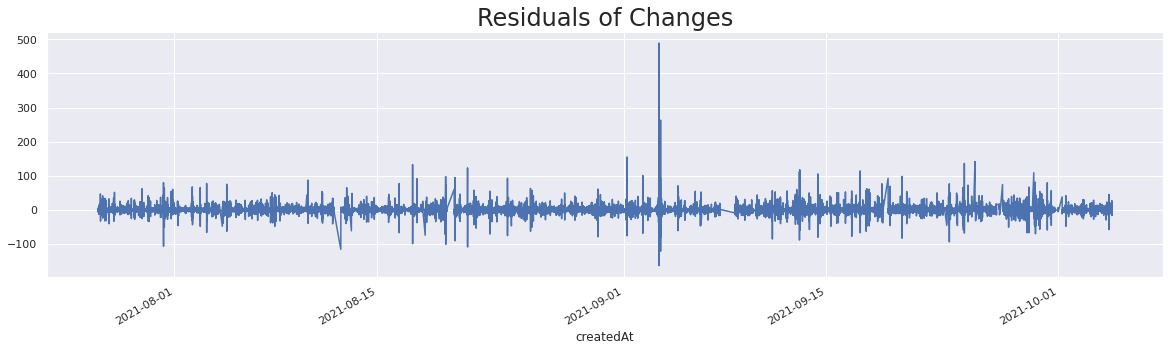

In [823]:
df.res_changes[1:].plot(figsize=(20,5))
plt.title('Residuals of Changes', size=24)
plt.show()

### ACF for Returns

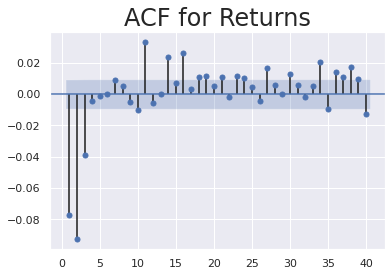

In [824]:
sgt.plot_acf(df.returns[1:], zero = False, lags = 40)
plt.title('ACF for Returns', size = 24)
plt.show()

### MA(1) for Returns

In [825]:
from statsmodels.tsa.arima_model import ARIMA

In [826]:
model_ret_ma_1 = ARMA(df.returns[1:], order=(0,1))
results_ret_ma_1 = model_ret_ma_1.fit()
results_ret_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                44839
Model:                     ARMA(0, 1)   Log Likelihood             -196850.415
Method:                       css-mle   S.D. of innovations             19.516
Date:                Wed, 24 Nov 2021   AIC                         393706.831
Time:                        00:47:24   BIC                         393732.963
Sample:                             0   HQIC                        393715.058
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.3861      0.083     16.652      0.000       1.223       1.549
ma.L1.returns    -0.0968      0.005    -18.299      0.000      -0.107      -0.086
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           10.3309           +0.0000j           10.3309            0.0000
-----------------------------------------------------------------------------
"""

### Higher-Lag MA Models for Returns

In [827]:
model_ret_ma_2 = ARMA(df.returns[1:], order=(0,2))
results_ret_ma_2 = model_ret_ma_2.fit()
print(results_ret_ma_2.summary())
print('\nLLR test p-value = ' + str(LLR_test(results_ret_ma_1, results_ret_ma_2)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                44839
Model:                     ARMA(0, 2)   Log Likelihood             -196614.653
Method:                       css-mle   S.D. of innovations             19.413
Date:                Wed, 24 Nov 2021   AIC                         393237.305
Time:                        00:47:25   BIC                         393272.149
Sample:                             0   HQIC                        393248.276
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.3861      0.073     18.874      0.000       1.242       1.530
ma.L1.returns    -0.0958      0.005    -20.399      0.000      -0.105      -0.087
ma.L2.returns    -0.1032      0.005    -

In [828]:
model_ret_ma_3 = ARMA(df.returns[1:], order=(0,3))
results_ret_ma_3 = model_ret_ma_3.fit()
print(results_ret_ma_3.summary())
print('\nLLR test p-value = ' + str(LLR_test(results_ret_ma_2, results_ret_ma_3)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                44839
Model:                     ARMA(0, 3)   Log Likelihood             -196577.982
Method:                       css-mle   S.D. of innovations             19.398
Date:                Wed, 24 Nov 2021   AIC                         393165.964
Time:                        00:47:26   BIC                         393209.518
Sample:                             0   HQIC                        393179.676
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.3861      0.070     19.683      0.000       1.248       1.524
ma.L1.returns    -0.0919      0.005    -19.475      0.000      -0.101      -0.083
ma.L2.returns    -0.0991      0.005    -

In [829]:
model_ret_ma_4 = ARMA(df.returns[1:], order=(0,4))
results_ret_ma_4 = model_ret_ma_4.fit()
print(results_ret_ma_4.summary())
print('\nLLR test p-value = ' + str(LLR_test(results_ret_ma_3, results_ret_ma_4)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                44839
Model:                     ARMA(0, 4)   Log Likelihood             -196577.710
Method:                       css-mle   S.D. of innovations             19.397
Date:                Wed, 24 Nov 2021   AIC                         393167.421
Time:                        00:47:28   BIC                         393219.686
Sample:                             0   HQIC                        393183.876
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.3861      0.070     19.748      0.000       1.249       1.524
ma.L1.returns    -0.0917      0.005    -19.419      0.000      -0.101      -0.082
ma.L2.returns    -0.0987      0.005    -

In [830]:
model_ret_ma_5 = ARMA(df.returns[1:], order=(0,5))
results_ret_ma_5 = model_ret_ma_5.fit()
print(results_ret_ma_5.summary())
print('\nLLR test p-value = ' + str(LLR_test(results_ret_ma_4, results_ret_ma_5)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                44839
Model:                     ARMA(0, 5)   Log Likelihood             -196577.680
Method:                       css-mle   S.D. of innovations             19.397
Date:                Wed, 24 Nov 2021   AIC                         393169.361
Time:                        00:47:31   BIC                         393230.337
Sample:                             0   HQIC                        393188.559
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.3861      0.070     19.727      0.000       1.248       1.524
ma.L1.returns    -0.0917      0.005    -19.421      0.000      -0.101      -0.082
ma.L2.returns    -0.0988      0.005    -

In [831]:
model_ret_ma_6 = ARMA(df.returns[1:], order=(0,6))
results_ret_ma_6 = model_ret_ma_6.fit()
print(results_ret_ma_6.summary())
print('\nLLR test p-value = ' + str(LLR_test(results_ret_ma_5, results_ret_ma_6)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                44839
Model:                     ARMA(0, 6)   Log Likelihood             -196577.542
Method:                       css-mle   S.D. of innovations             19.397
Date:                Wed, 24 Nov 2021   AIC                         393171.083
Time:                        00:47:37   BIC                         393240.770
Sample:                             0   HQIC                        393193.023
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.3861      0.070     19.685      0.000       1.248       1.524
ma.L1.returns    -0.0918      0.005    -19.428      0.000      -0.101      -0.083
ma.L2.returns    -0.0988      0.005    -

In [832]:
model_ret_ma_7 = ARMA(df.returns[1:], order=(0,7))
results_ret_ma_7 = model_ret_ma_7.fit()
print(results_ret_ma_7.summary())
print('\nLLR test p-value = ' + str(LLR_test(results_ret_ma_6, results_ret_ma_7)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                44839
Model:                     ARMA(0, 7)   Log Likelihood             -196575.593
Method:                       css-mle   S.D. of innovations             19.396
Date:                Wed, 24 Nov 2021   AIC                         393169.186
Time:                        00:47:45   BIC                         393247.583
Sample:                             0   HQIC                        393193.868
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.3861      0.071     19.535      0.000       1.247       1.525
ma.L1.returns    -0.0919      0.005    -19.451      0.000      -0.101      -0.083
ma.L2.returns    -0.0988      0.005    -

In [833]:
LLR_test(results_ret_ma_3, results_ret_ma_7, DF=2)

0.092

### Residuals of Returns

In [834]:
df['res_ret_ma_7'] = results_ret_ma_7.resid[1:]

In [835]:
print('The mean of the residual is ' + str(round(df.res_ret_ma_7.mean(),3)) + '\nThe variance of the residual is ' + str(round(df.res_ret_ma_7.var(),3)))

The mean of the residual is 0.0
The variance of the residual is 376.24


In [836]:
from math import sqrt
round(sqrt(df.res_ret_ma_7.var()),3)

19.397

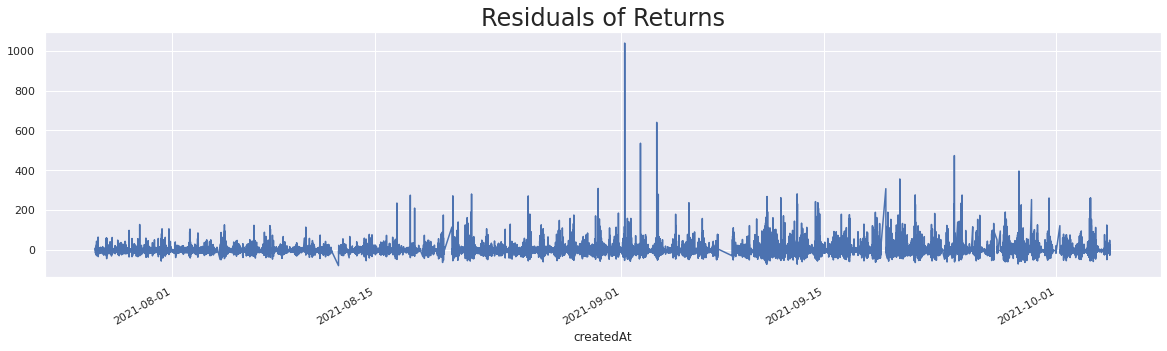

In [837]:
df.res_ret_ma_7[1:].plot(figsize=(20,5))
plt.title('Residuals of Returns', size= 24)
plt.show()

In [838]:
sts.adfuller(df.res_ret_ma_7[2:])

(-22.628604512884902,
 0.0,
 50,
 44787,
 {'1%': -3.4304960172558077,
  '10%': -2.5668043506535176,
  '5%': -2.861604536462731},
 392383.2953393477)

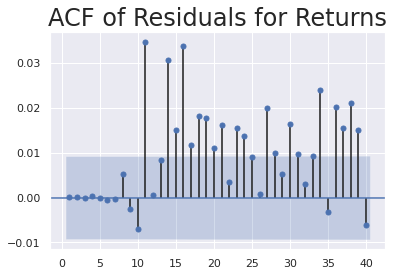

In [839]:
sgt.plot_acf(df.res_ret_ma_7[2:],zero=False, lags=40)
plt.title('ACF of Residuals for Returns', size = 24)
plt.show()

### Normalized Returns

In [840]:
bench_ret = df.returns.iloc[1]
df['norm_ret'] = df.returns.div(bench_ret).mul(100)

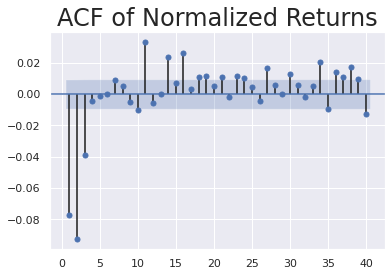

In [841]:
sgt.plot_acf(df.norm_ret[1:],zero=False, lags=40)
plt.title('ACF of Normalized Returns', size = 24)
plt.show()

In [842]:
model_norm_ret_ma_7 = ARMA(df.norm_ret[1:], order = (0,7))
results_norm_ret_ma_7 = model_norm_ret_ma_7.fit()
results_norm_ret_ma_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                44839
Model:                     ARMA(0, 7)   Log Likelihood             -327551.151
Method:                       css-mle   S.D. of innovations            360.003
Date:                Wed, 24 Nov 2021   AIC                         655120.301
Time:                        00:48:03   BIC                         655198.699
Sample:                             0   HQIC                        655144.984
                                                                              
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -25.7264      1.317    -19.535      0.000     -28.308     -23.145
ma.L1.norm_ret    -0.0919      0.005    -19.451      0.000      -0.101      -0.083
ma.L2.norm_ret    -0.0988      0.005    -20.832      0.000      -0.108      -0.090
ma.L3.norm_ret    -0.0401      0.005     -8.406      0.000      -0.049      -0.031
ma.L4.norm_ret    -0.0049      0.005     -1.022      0.307      -0.014       0.004
ma.L5.norm_ret    -0.0002      0.005     -0.046      0.963      -0.010       0.009
ma.L6.norm_ret     0.0014      0.005      0.302      0.763      -0.008       0.011
ma.L7.norm_ret     0.0090      0.005      1.974      0.048    6.49e-05       0.018
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.7322           -0.5875j            1.8291           -0.0520
MA.2            1.7322           +0.5875j            1.8291            0.0520
MA.3            0.4420           -2.0204j            2.0681           -0.2157
MA.4            0.4420           +2.0204j            2.0681            0.2157
MA.5           -1.9925           -0.0000j            1.9925           -0.5000
MA.6           -1.2572           -1.5156j            1.9692           -0.3602
MA.7           -1.2572           +1.5156j            1.9692            0.3602
-----------------------------------------------------------------------------
"""

In [843]:
df['res_norm_ret_ma_7'] = results_ret_ma_7.resid[1:]

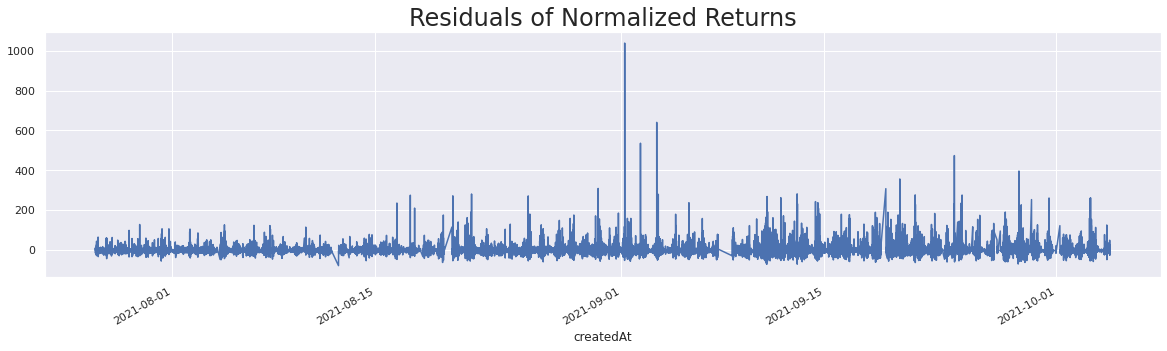

In [844]:
df.res_norm_ret_ma_7[1:].plot(figsize=(20,5))
plt.title('Residuals of Normalized Returns', size= 24)
plt.show()

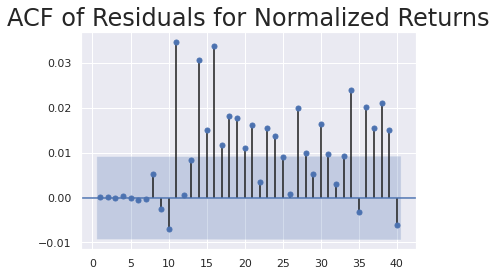

In [845]:
sgt.plot_acf(df.res_norm_ret_ma_7[2:],zero=False, lags=40)
plt.title('ACF of Residuals for Normalized Returns', size = 24)
plt.show()

### MA Models for Pollutants 

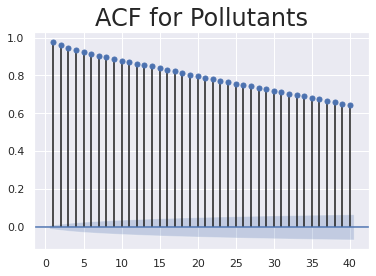

In [846]:
sgt.plot_acf(df.PM2,zero=False, lags=40)
plt.title('ACF for Pollutants', size = 24)
plt.show()

In [847]:
model_ma_1 = ARMA(df.PM2, order = (0,1))
results_ma_1 = model_ma_1.fit()
results_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                    PM2   No. Observations:                44840
Model:                     ARMA(0, 1)   Log Likelihood             -204940.954
Method:                       css-mle   S.D. of innovations             23.372
Date:                Wed, 24 Nov 2021   AIC                         409887.908
Time:                        00:48:11   BIC                         409914.041
Sample:                             0   HQIC                        409896.136
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         52.9195      0.207    256.037      0.000      52.514      53.325
ma.L1.PM2      0.8726      0.002    531.314      0.000       0.869       0.876
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.1459           +0.0000j            1.1459            0.5000
-----------------------------------------------------------------------------
"""

### ARMA(1,1)

In [848]:
model_ret_ar_1_ma_1 = ARMA(df.returns[1:], order = (1,1))
results_ret_ar_1_ma_1 = model_ret_ar_1_ma_1.fit()
results_ret_ar_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                44839
Model:                     ARMA(1, 1)   Log Likelihood             -196627.957
Method:                       css-mle   S.D. of innovations             19.419
Date:                Wed, 24 Nov 2021   AIC                         393263.914
Time:                        00:48:33   BIC                         393298.757
Sample:                             0   HQIC                        393274.884
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.3861      0.069     20.070      0.000       1.251       1.521
ar.L1.returns     0.5536      0.017     32.479      0.000       0.520       0.587
ma.L1.returns    -0.6638      0.015    -43.887      0.000      -0.693      -0.634
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.8063           +0.0000j            1.8063            0.0000
MA.1            1.5064           +0.0000j            1.5064            0.0000
-----------------------------------------------------------------------------
"""

In [849]:
model_ret_ar_1 = ARMA(df.returns[1:], order = (1,0))
model_ret_ma_1 = ARMA(df.returns[1:], order = (0,1))

In [850]:
print('\nARMA vs AR', LLR_test(results_ret_ar_1, results_ret_ar_1_ma_1))
print('\nARMA vs MA', LLR_test(results_ret_ma_1, results_ret_ar_1_ma_1))


ARMA vs AR 0.0

ARMA vs MA 0.0


### Higher-Lag ARMA Models

In [851]:
model_ret_ar_3_ma_3 = ARMA(df.returns[1:], order = (3,3))
results_ret_ar_3_ma_3 = model_ret_ar_3_ma_3.fit()

In [852]:
LLR_test(results_ret_ar_1_ma_1, results_ret_ar_3_ma_3,  DF = 4)

0.0

In [853]:
results_ret_ar_3_ma_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                44839
Model:                     ARMA(3, 3)   Log Likelihood             -196577.358
Method:                       css-mle   S.D. of innovations             19.397
Date:                Wed, 24 Nov 2021   AIC                         393170.716
Time:                        00:49:01   BIC                         393240.402
Sample:                             0   HQIC                        393192.656
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.3861      0.070     19.663      0.000       1.248       1.524
ar.L1.returns     0.0073      0.726      0.010      0.992      -1.416       1.431
ar.L2.returns     0.1268      0.430      0.295      0.768      -0.717       0.970
ar.L3.returns    -0.0784      0.149     -0.527      0.598      -0.370       0.213
ma.L1.returns    -0.0991      0.726     -0.136      0.891      -1.523       1.324
ma.L2.returns    -0.2247      0.494     -0.455      0.649      -1.194       0.744
ma.L3.returns     0.0505      0.131      0.386      0.700      -0.206       0.307
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.9137           -0.0000j            1.9137           -0.5000
AR.2            1.7650           -1.8833j            2.5811           -0.1302
AR.3            1.7650           +1.8833j            2.5811            0.1302
MA.1           -1.9233           -0.0000j            1.9233           -0.5000
MA.2            3.1863           -0.3766j            3.2084           -0.0187
MA.3            3.1863           +0.3766j            3.2084            0.0187
-----------------------------------------------------------------------------
"""

In [854]:
model_ret_ar_3_ma_2 = ARMA(df.returns[1:], order = (3,2))
results_ret_ar_3_ma_2 = model_ret_ar_3_ma_2.fit()
results_ret_ar_3_ma_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                44839
Model:                     ARMA(3, 2)   Log Likelihood             -196455.145
Method:                       css-mle   S.D. of innovations             19.344
Date:                Wed, 24 Nov 2021   AIC                         392924.290
Time:                        00:49:59   BIC                         392985.266
Sample:                             0   HQIC                        392943.487
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.3847      0.135     10.232      0.000       1.119       1.650
ar.L1.returns     1.5574      0.023     66.969      0.000       1.512       1.603
ar.L2.returns    -0.6113      0.020    -30.602      0.000      -0.650      -0.572
ar.L3.returns     0.0483      0.007      7.422      0.000       0.036       0.061
ma.L1.returns    -1.6550      0.023    -72.059      0.000      -1.700      -1.610
ma.L2.returns     0.6632      0.023     29.134      0.000       0.619       0.708
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0116           +0.0000j            1.0116            0.0000
AR.2            2.1582           +0.0000j            2.1582            0.0000
AR.3            9.4738           +0.0000j            9.4738            0.0000
MA.1            1.0263           +0.0000j            1.0263            0.0000
MA.2            1.4692           +0.0000j            1.4692            0.0000
-----------------------------------------------------------------------------
"""

In [855]:
model_ret_ar_2_ma_3 = ARMA(df.returns[1:], order = (2,3))
results_ret_ar_2_ma_3 = model_ret_ar_2_ma_3.fit()
results_ret_ar_2_ma_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                44839
Model:                     ARMA(2, 3)   Log Likelihood             -196454.057
Method:                       css-mle   S.D. of innovations             19.344
Date:                Wed, 24 Nov 2021   AIC                         392922.115
Time:                        00:50:50   BIC                         392983.090
Sample:                             0   HQIC                        392941.312
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.3847      0.135     10.250      0.000       1.120       1.649
ar.L1.returns     1.4829      0.030     49.703      0.000       1.424       1.541
ar.L2.returns    -0.4888      0.030    -16.470      0.000      -0.547      -0.431
ma.L1.returns    -1.5800      0.030    -52.695      0.000      -1.639      -1.521
ma.L2.returns     0.5309      0.036     14.748      0.000       0.460       0.601
ma.L3.returns     0.0578      0.007      7.839      0.000       0.043       0.072
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0118           +0.0000j            1.0118            0.0000
AR.2            2.0222           +0.0000j            2.0222            0.0000
MA.1            1.0267           +0.0000j            1.0267            0.0000
MA.2            1.4455           +0.0000j            1.4455            0.0000
MA.3          -11.6548           +0.0000j           11.6548            0.5000
-----------------------------------------------------------------------------
"""

In [856]:
LLR_test(results_ret_ar_2_ma_3, results_ret_ar_3_ma_3)

1.0

In [857]:
model_ret_ar_3_ma_1 = ARMA(df.returns[1:], order = (3,1))
results_ret_ar_3_ma_1 = model_ret_ar_3_ma_1.fit()
results_ret_ar_3_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                44839
Model:                     ARMA(3, 1)   Log Likelihood             -196577.459
Method:                       css-mle   S.D. of innovations             19.397
Date:                Wed, 24 Nov 2021   AIC                         393166.918
Time:                        00:51:20   BIC                         393219.183
Sample:                             0   HQIC                        393183.373
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.3861      0.070     19.685      0.000       1.248       1.524
ar.L1.returns     0.3307      0.059      5.595      0.000       0.215       0.447
ar.L2.returns    -0.0684      0.007     -9.604      0.000      -0.082      -0.054
ar.L3.returns    -0.0137      0.009     -1.540      0.124      -0.031       0.004
ma.L1.returns    -0.4224      0.059     -7.163      0.000      -0.538      -0.307
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.8641           -2.2137j            2.8941           -0.1386
AR.2            1.8641           +2.2137j            2.8941            0.1386
AR.3           -8.7367           -0.0000j            8.7367           -0.5000
MA.1            2.3674           +0.0000j            2.3674            0.0000
-----------------------------------------------------------------------------
"""

In [858]:
LLR_test(results_ret_ar_3_ma_1, results_ret_ar_3_ma_2)

0.0

In [859]:
model_ret_ar_2_ma_2 = ARMA(df.returns[1:], order = (2,2))
results_ret_ar_2_ma_2 = model_ret_ar_2_ma_2.fit()
results_ret_ar_2_ma_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                44839
Model:                     ARMA(2, 2)   Log Likelihood             -196577.369
Method:                       css-mle   S.D. of innovations             19.397
Date:                Wed, 24 Nov 2021   AIC                         393166.738
Time:                        00:51:50   BIC                         393219.003
Sample:                             0   HQIC                        393183.193
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.3861      0.071     19.655      0.000       1.248       1.524
ar.L1.returns     0.5563      0.102      5.436      0.000       0.356       0.757
ar.L2.returns    -0.1619      0.061     -2.654      0.008      -0.282      -0.042
ma.L1.returns    -0.6481      0.103     -6.302      0.000      -0.850      -0.447
ma.L2.returns     0.1144      0.072      1.593      0.111      -0.026       0.255
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.7176           -1.7957j            2.4849           -0.1285
AR.2            1.7176           +1.7957j            2.4849            0.1285
MA.1            2.8337           -0.8452j            2.9571           -0.0461
MA.2            2.8337           +0.8452j            2.9571            0.0461
-----------------------------------------------------------------------------
"""

In [860]:
model_ret_ar_1_ma_3 = ARMA(df.returns[1:], order = (1,3))
results_ret_ar_1_ma_3 = model_ret_ar_1_ma_3.fit()
results_ret_ar_1_ma_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                44839
Model:                     ARMA(1, 3)   Log Likelihood             -196577.729
Method:                       css-mle   S.D. of innovations             19.397
Date:                Wed, 24 Nov 2021   AIC                         393167.459
Time:                        00:52:16   BIC                         393219.724
Sample:                             0   HQIC                        393183.914
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.3861      0.070     19.748      0.000       1.249       1.524
ar.L1.returns     0.0787      0.109      0.720      0.472      -0.136       0.293
ma.L1.returns    -0.1704      0.109     -1.560      0.119      -0.385       0.044
ma.L2.returns    -0.0915      0.012     -7.949      0.000      -0.114      -0.069
ma.L3.returns    -0.0321      0.013     -2.553      0.011      -0.057      -0.007
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           12.7062           +0.0000j           12.7062            0.0000
MA.1            2.0385           -0.0000j            2.0385           -0.0000
MA.2           -2.4433           -3.0486j            3.9069           -0.3575
MA.3           -2.4433           +3.0486j            3.9069            0.3575
-----------------------------------------------------------------------------
"""

In [861]:
print('\n ARMA (3,2): \tLL = ', results_ret_ar_3_ma_2.llf, results_ret_ar_3_ma_2.aic)
print('\n ARMA (1,3): \tLL = ', results_ret_ar_1_ma_3.llf, results_ret_ar_1_ma_3.aic)


 ARMA (3,2): 	LL =  -196455.1448346937 392924.2896693874

 ARMA (1,3): 	LL =  -196577.72944019863 393167.45888039726


# Residuals for Returns

---



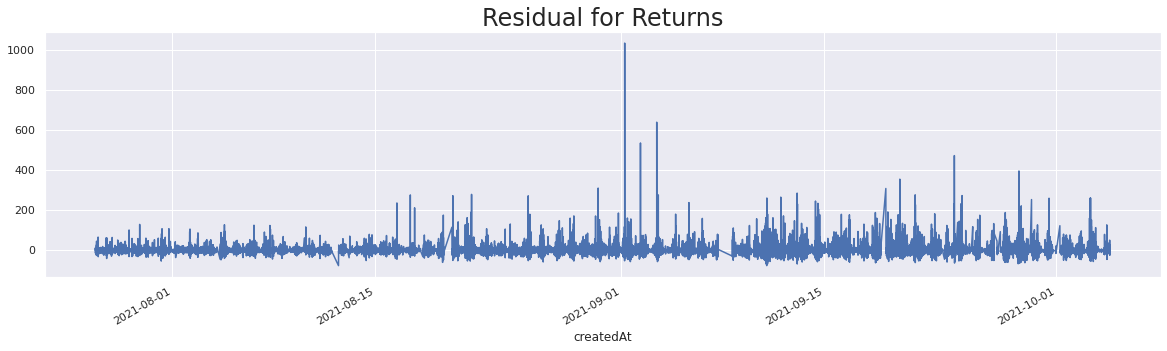

In [862]:
df['res_ret_ar_3_ma_2'] = results_ret_ar_3_ma_2.resid[1:]
df.res_ret_ar_3_ma_2.plot(figsize=(20,5))
plt.title('Residual for Returns', size=24)
plt.show()

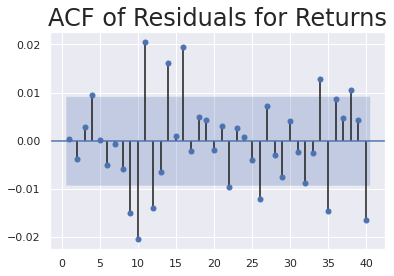

In [863]:
sgt.plot_acf(df.res_ret_ar_3_ma_2[2:], zero=False, lags = 40)
plt.title('ACF of Residuals for Returns', size=24)
plt.show()


Re-evaluating Model Selection 

In [864]:
model_ret_ar_5_ma_5 = ARMA(df.returns[1:], order = (5,5))
results_ret_ar_5_ma_5 = model_ret_ar_5_ma_5.fit()
results_ret_ar_5_ma_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                44839
Model:                     ARMA(5, 5)   Log Likelihood             -196441.637
Method:                       css-mle   S.D. of innovations             19.339
Date:                Wed, 24 Nov 2021   AIC                         392907.273
Time:                        00:53:55   BIC                         393011.803
Sample:                             0   HQIC                        392940.183
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.3847      0.134     10.305      0.000       1.121       1.648
ar.L1.returns    -0.1735      0.215     -0.808      0.419      -0.595       0.248
ar.L2.returns     0.9171      0.055     16.762      0.000       0.810       1.024
ar.L3.returns     0.7168      0.186      3.857      0.000       0.353       1.081
ar.L4.returns    -0.3989      0.100     -3.975      0.000      -0.596      -0.202
ar.L5.returns    -0.0834      0.115     -0.728      0.467      -0.308       0.141
ma.L1.returns     0.0767      0.215      0.357      0.721      -0.344       0.497
ma.L2.returns    -1.0371      0.072    -14.358      0.000      -1.179      -0.896
ma.L3.returns    -0.6887      0.201     -3.424      0.001      -1.083      -0.294
ma.L4.returns     0.5418      0.086      6.294      0.000       0.373       0.710
ma.L5.returns     0.1397      0.138      1.011      0.312      -0.131       0.411
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.8474           -0.6173j            1.0484           -0.3998
AR.2           -0.8474           +0.6173j            1.0484            0.3998
AR.3            1.0122           -0.0000j            1.0122           -0.0000
AR.4            1.8203           -0.0000j            1.8203           -0.0000
AR.5           -5.9200           -0.0000j            5.9200           -0.5000
MA.1           -0.8436           -0.6127j            1.0427           -0.4000
MA.2           -0.8436           +0.6127j            1.0427            0.4000
MA.3            1.0280           -0.0000j            1.0280           -0.0000
MA.4            1.3898           -0.0000j            1.3898           -0.0000
MA.5           -4.6094           -0.0000j            4.6094           -0.5000
-----------------------------------------------------------------------------
"""

In [865]:
model_ret_ar_5_ma_1 = ARMA(df.returns[1:], order = (5,1))
results_ret_ar_5_ma_1 = model_ret_ar_5_ma_1.fit()
results_ret_ar_5_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                44839
Model:                     ARMA(5, 1)   Log Likelihood             -196576.848
Method:                       css-mle   S.D. of innovations             19.397
Date:                Wed, 24 Nov 2021   AIC                         393169.696
Time:                        00:54:42   BIC                         393239.383
Sample:                             0   HQIC                        393191.636
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.3861      0.070     19.677      0.000       1.248       1.524
ar.L1.returns     0.1325      0.219      0.606      0.545      -0.296       0.561
ar.L2.returns    -0.0867      0.021     -4.211      0.000      -0.127      -0.046
ar.L3.returns    -0.0350      0.024     -1.471      0.141      -0.082       0.012
ar.L4.returns    -0.0108      0.013     -0.802      0.422      -0.037       0.016
ar.L5.returns    -0.0087      0.007     -1.190      0.234      -0.023       0.006
ma.L1.returns    -0.2243      0.219     -1.025      0.305      -0.653       0.204
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.4727           -1.6177j            2.1876           -0.1325
AR.2            1.4727           +1.6177j            2.1876            0.1325
AR.3           -2.9946           -0.0000j            2.9946           -0.5000
AR.4           -0.5951           -2.7628j            2.8261           -0.2838
AR.5           -0.5951           +2.7628j            2.8261            0.2838
MA.1            4.4592           +0.0000j            4.4592            0.0000
-----------------------------------------------------------------------------
"""

In [866]:
model_ret_ar_1_ma_5 = ARMA(df.returns[1:], order = (1,5))
results_ret_ar_1_ma_5 = model_ret_ar_1_ma_5.fit()
results_ret_ar_1_ma_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                44839
Model:                     ARMA(1, 5)   Log Likelihood             -196463.196
Method:                       css-mle   S.D. of innovations             19.348
Date:                Wed, 24 Nov 2021   AIC                         392942.392
Time:                        00:55:45   BIC                         393012.078
Sample:                             0   HQIC                        392964.332
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.3847      0.138     10.056      0.000       1.115       1.655
ar.L1.returns     0.9900      0.002    599.684      0.000       0.987       0.993
ma.L1.returns    -1.0872      0.005   -217.750      0.000      -1.097      -1.077
ma.L2.returns    -0.0085      0.007     -1.212      0.226      -0.022       0.005
ma.L3.returns     0.0567      0.007      8.197      0.000       0.043       0.070
ma.L4.returns     0.0346      0.007      4.936      0.000       0.021       0.048
ma.L5.returns     0.0195      0.005      4.060      0.000       0.010       0.029
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0101           +0.0000j            1.0101            0.0000
MA.1            1.0221           -0.0000j            1.0221           -0.0000
MA.2            1.7308           -0.0000j            1.7308           -0.0000
MA.3           -3.1400           -0.0000j            3.1400           -0.5000
MA.4           -0.6960           -2.9607j            3.0414           -0.2867
MA.5           -0.6960           +2.9607j            3.0414            0.2867
-----------------------------------------------------------------------------
"""

In [867]:
print('\n ARMA (5,1): \tLL = ', results_ret_ar_5_ma_1.llf, '\t AIC = ', results_ret_ar_5_ma_1.aic)
print('\n ARMA (1,5): \tLL = ', results_ret_ar_1_ma_5.llf,  '\t AIC = ', results_ret_ar_1_ma_5.aic)


 ARMA (5,1): 	LL =  -196576.84797891258 	 AIC =  393169.69595782517

 ARMA (1,5): 	LL =  -196463.19580267614 	 AIC =  392942.3916053523


In [868]:
print('\n ARMA (3,2): \tLL = ', results_ret_ar_3_ma_2.llf, '\t AIC = ', results_ret_ar_3_ma_2.aic)


 ARMA (3,2): 	LL =  -196455.1448346937 	 AIC =  392924.2896693874


Residuals for the New Model

In [869]:
df['res_ret_ar_5_ma_1'] = results_ret_ar_5_ma_1.resid

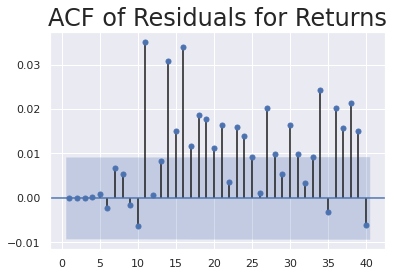

In [870]:
sgt.plot_acf(df.res_ret_ar_5_ma_1[1:], zero=False, lags = 40)
plt.title('ACF of Residuals for Returns', size=24)
plt.show()

ARMA Model for Pollutant

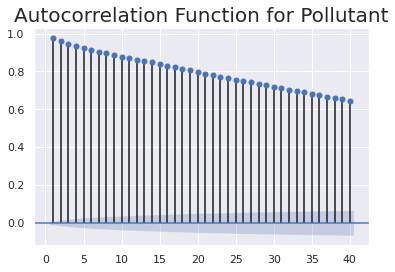

In [871]:
sgt.plot_acf(df.PM2, unbiased=True, zero=False, lags = 40)
plt.title('Autocorrelation Function for Pollutant', size=20)
plt.show()

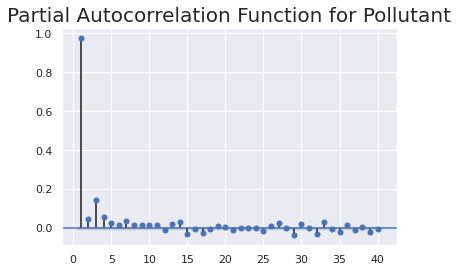

In [872]:
sgt.plot_pacf(df.PM2, alpha=0.05, zero=False, lags = 40, method=('ols'))
plt.title('Partial Autocorrelation Function for Pollutant', size=20)
plt.show()

In [873]:
model_ar_1_ma_1 = ARMA(df.PM2, order = (1,1))
results_ar_1_ma_1 = model_ar_1_ma_1.fit()
results_ar_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                    PM2   No. Observations:                44840
Model:                     ARMA(1, 1)   Log Likelihood             -159485.226
Method:                       css-mle   S.D. of innovations              8.481
Date:                Wed, 24 Nov 2021   AIC                         318978.453
Time:                        00:56:22   BIC                         319013.296
Sample:                             0   HQIC                        318989.423
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         52.9053      1.970     26.851      0.000      49.043      56.767
ar.L1.PM2      0.9811      0.001   1042.451      0.000       0.979       0.983
ma.L1.PM2     -0.0704      0.006    -12.167      0.000      -0.082      -0.059
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0192           +0.0000j            1.0192            0.0000
MA.1           14.2022           +0.0000j           14.2022            0.0000
-----------------------------------------------------------------------------
"""

In [874]:
df['res_ar_1_ma_1'] = results_ar_1_ma_1.resid

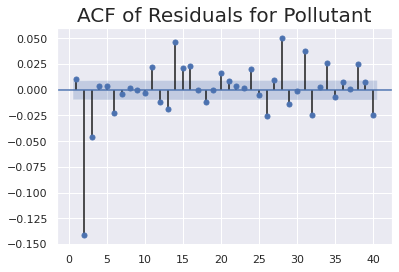

In [875]:
sgt.plot_acf(df.res_ar_1_ma_1, zero=False, lags = 40)
plt.title('ACF of Residuals for Pollutant', size=20)
plt.show()

In [876]:
model_ar_6_ma_6 = ARMA(df.PM2, order = (6,6))
results_ar_6_ma_6 = model_ar_6_ma_6.fit()
results_ar_6_ma_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                    PM2   No. Observations:                44840
Model:                     ARMA(6, 6)   Log Likelihood             -158835.881
Method:                       css-mle   S.D. of innovations              8.359
Date:                Wed, 24 Nov 2021   AIC                         317699.761
Time:                        00:58:23   BIC                         317821.713
Sample:                             0   HQIC                        317738.156
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         52.9224      2.743     19.293      0.000      47.546      58.299
ar.L1.PM2      0.2509      0.125      2.004      0.045       0.005       0.496
ar.L2.PM2      0.0853      0.094      0.903      0.366      -0.100       0.270
ar.L3.PM2      1.0588      0.045     23.594      0.000       0.971       1.147
ar.L4.PM2     -0.3404      0.115     -2.965      0.003      -0.565      -0.115
ar.L5.PM2      0.1519      0.094      1.620      0.105      -0.032       0.336
ar.L6.PM2     -0.2223      0.037     -6.013      0.000      -0.295      -0.150
ma.L1.PM2      0.6624      0.125      5.288      0.000       0.417       0.908
ma.L2.PM2      0.4351      0.129      3.364      0.001       0.182       0.689
ma.L3.PM2     -0.6327      0.082     -7.713      0.000      -0.793      -0.472
ma.L4.PM2     -0.1806      0.086     -2.092      0.036      -0.350      -0.011
ma.L5.PM2     -0.1982      0.058     -3.438      0.001      -0.311      -0.085
ma.L6.PM2      0.0140      0.015      0.951      0.341      -0.015       0.043
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.6121           -0.8108j            1.0159           -0.3529
AR.2           -0.6121           +0.8108j            1.0159            0.3529
AR.3            1.0095           -0.0000j            1.0095           -0.0000
AR.4            1.5120           -0.0000j            1.5120           -0.0000
AR.5           -0.3069           -1.6618j            1.6899           -0.2791
AR.6           -0.3069           +1.6618j            1.6899            0.2791
MA.1           -0.6086           -0.8175j            1.0192           -0.3519
MA.2           -0.6086           +0.8175j            1.0192            0.3519
MA.3            1.3041           -0.0000j            1.3041           -0.0000
MA.4           -0.5610           -1.7767j            1.8632           -0.2987
MA.5           -0.5610           +1.7767j            1.8632            0.2987
MA.6           15.1746           -0.0000j           15.1746           -0.0000
-----------------------------------------------------------------------------
"""

In [877]:
model_ar_5_ma_6 = ARMA(df.PM2, order = (5,6))
results_ar_5_ma_6 = model_ar_5_ma_6.fit()
results_ar_5_ma_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                    PM2   No. Observations:                44840
Model:                     ARMA(5, 6)   Log Likelihood             -158827.399
Method:                       css-mle   S.D. of innovations              8.357
Date:                Wed, 24 Nov 2021   AIC                         317680.798
Time:                        01:00:54   BIC                         317794.039
Sample:                             0   HQIC                        317716.451
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         52.9002      2.734     19.347      0.000      47.541      58.259
ar.L1.PM2      0.3508      0.145      2.427      0.015       0.068       0.634
ar.L2.PM2      0.1059      0.158      0.668      0.504      -0.205       0.416
ar.L3.PM2      0.6886      0.103      6.708      0.000       0.487       0.890
ar.L4.PM2      0.3127      0.175      1.788      0.074      -0.030       0.655
ar.L5.PM2     -0.4725      0.098     -4.798      0.000      -0.666      -0.279
ma.L1.PM2      0.5618      0.145      3.883      0.000       0.278       0.845
ma.L2.PM2      0.3244      0.069      4.674      0.000       0.188       0.460
ma.L3.PM2     -0.3506      0.082     -4.301      0.000      -0.510      -0.191
ma.L4.PM2     -0.5848      0.103     -5.690      0.000      -0.786      -0.383
ma.L5.PM2      0.0185      0.019      0.967      0.333      -0.019       0.056
ma.L6.PM2      0.0380      0.013      2.826      0.005       0.012       0.064
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.3231           -0.0000j            1.3231           -0.5000
AR.2           -0.2779           -0.9786j            1.0173           -0.2940
AR.3           -0.2779           +0.9786j            1.0173            0.2940
AR.4            1.0096           -0.0000j            1.0096           -0.0000
AR.5            1.5309           -0.0000j            1.5309           -0.0000
MA.1           -0.2863           -0.9772j            1.0183           -0.2954
MA.2           -0.2863           +0.9772j            1.0183            0.2954
MA.3            1.3200           -0.0000j            1.3200           -0.0000
MA.4           -1.3129           -0.0000j            1.3129           -0.5000
MA.5            3.8669           -0.0000j            3.8669           -0.0000
MA.6           -3.7880           -0.0000j            3.7880           -0.5000
-----------------------------------------------------------------------------
"""

In [878]:
model_ar_6_ma_1 = ARMA(df.PM2, order = (6,1))
results_ar_6_ma_1 = model_ar_6_ma_1.fit()
results_ar_6_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                    PM2   No. Observations:                44840
Model:                     ARMA(6, 1)   Log Likelihood             -158899.166
Method:                       css-mle   S.D. of innovations              8.371
Date:                Wed, 24 Nov 2021   AIC                         317816.332
Time:                        01:02:44   BIC                         317894.729
Sample:                             0   HQIC                        317841.014
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         52.8796      2.746     19.258      0.000      47.498      58.261
ar.L1.PM2      1.6878      0.030     56.635      0.000       1.629       1.746
ar.L2.PM2     -0.7922      0.028    -27.933      0.000      -0.848      -0.737
ar.L3.PM2      0.1543      0.010     14.947      0.000       0.134       0.175
ar.L4.PM2     -0.0350      0.010     -3.373      0.001      -0.055      -0.015
ar.L5.PM2     -0.0270      0.009     -2.908      0.004      -0.045      -0.009
ar.L6.PM2      0.0089      0.005      1.681      0.093      -0.001       0.019
ma.L1.PM2     -0.7759      0.029    -26.354      0.000      -0.834      -0.718
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0095           -0.0000j            1.0095           -0.0000
AR.2            1.4716           -0.0000j            1.4716           -0.0000
AR.3            0.1214           -2.4295j            2.4325           -0.2421
AR.4            0.1214           +2.4295j            2.4325            0.2421
AR.5           -3.4237           -0.0000j            3.4237           -0.5000
AR.6            3.7219           -0.0000j            3.7219           -0.0000
MA.1            1.2888           +0.0000j            1.2888            0.0000
-----------------------------------------------------------------------------
"""

In [879]:
print('\n ARMA (5,6): \tLL = ', results_ar_5_ma_6.llf, '\t AIC = ', results_ar_5_ma_6.aic)
print('\n ARMA (6,1): \tLL = ', results_ar_6_ma_1.llf,  '\t AIC = ', results_ar_6_ma_1.aic)


 ARMA (5,6): 	LL =  -158827.39893029502 	 AIC =  317680.79786059004

 ARMA (6,1): 	LL =  -158899.165798247 	 AIC =  317816.331596494


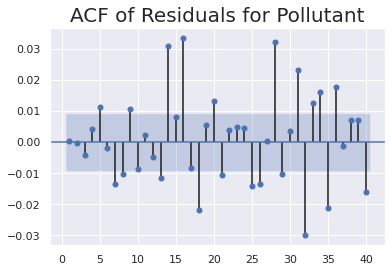

In [880]:
df['res_ar_5_ma_6'] = results_ar_5_ma_6.resid
sgt.plot_acf(df.res_ar_5_ma_6, zero=False, lags = 40)
plt.title('ACF of Residuals for Pollutant', size=20)
plt.show()

In [881]:
print('\n ARMA (5,6): \tLL = ', results_ar_5_ma_6.llf, '\t AIC = ', results_ar_5_ma_6.aic)
print('\n ARMA (5,1): \tLL = ', results_ret_ar_5_ma_1.llf,  '\t AIC = ', results_ret_ar_5_ma_1.aic)


 ARMA (5,6): 	LL =  -158827.39893029502 	 AIC =  317680.79786059004

 ARMA (5,1): 	LL =  -196576.84797891258 	 AIC =  393169.69595782517


ARIMA(1,1)

In [882]:
model_ar_1_i_1_ma_1 = ARIMA(df.PM2, order=(1,1,1))
results_ar_1_i_1_ma_1 = model_ar_1_i_1_ma_1.fit()
results_ar_1_i_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                  D.PM2   No. Observations:                44839
Model:                 ARIMA(1, 1, 1)   Log Likelihood             -159164.021
Method:                       css-mle   S.D. of innovations              8.421
Date:                Wed, 24 Nov 2021   AIC                         318336.042
Time:                        01:03:24   BIC                         318370.886
Sample:                             1   HQIC                        318347.012
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0002      0.024      0.007      0.994      -0.047       0.047
ar.L1.D.PM2     0.6882      0.012     59.041      0.000       0.665       0.711
ma.L1.D.PM2    -0.8114      0.009    -86.803      0.000      -0.830      -0.793
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.4530           +0.0000j            1.4530            0.0000
MA.1            1.2325           +0.0000j            1.2325            0.0000
-----------------------------------------------------------------------------
"""

Residuals of the ARIMA(1,1,1)

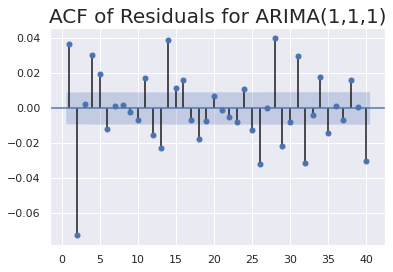

In [883]:
df['res_ar_1_i_1_ma_1'] = results_ar_1_i_1_ma_1.resid
sgt.plot_acf(df.res_ar_1_i_1_ma_1[1:], zero=False, lags = 40)
plt.title('ACF of Residuals for ARIMA(1,1,1)', size=20)
plt.show()

Higher-Lag ARIMA Models

In [884]:
model_ar_1_i_1_ma_2 = ARIMA(df.PM2, order=(1,1,2))
results_ar_1_i_1_ma_2 = model_ar_1_i_1_ma_2.fit()

model_ar_1_i_1_ma_3 = ARIMA(df.PM2, order=(1,1,3))
results_ar_1_i_1_ma_3 = model_ar_1_i_1_ma_3.fit()

model_ar_2_i_1_ma_1 = ARIMA(df.PM2, order=(2,1,1))
results_ar_2_i_1_ma_1 = model_ar_2_i_1_ma_1.fit()

model_ar_3_i_1_ma_1 = ARIMA(df.PM2, order=(3,1,1))
results_ar_3_i_1_ma_1 = model_ar_3_i_1_ma_1.fit()

model_ar_3_i_1_ma_2 = ARIMA(df.PM2, order=(3,1,2))
results_ar_3_i_1_ma_2 = model_ar_3_i_1_ma_2.fit()

In [885]:
print('\n ARMA (1,1,1): \tLL = ', results_ar_1_i_1_ma_1.llf, '\t AIC = ', results_ar_1_i_1_ma_1.aic)
print('\n ARMA (1,1,2): \tLL = ', results_ar_1_i_1_ma_2.llf, '\t AIC = ', results_ar_1_i_1_ma_2.aic)
print('\n ARMA (1,1,3): \tLL = ', results_ar_1_i_1_ma_3.llf, '\t AIC = ', results_ar_1_i_1_ma_3.aic)
print('\n ARMA (2,1,1): \tLL = ', results_ar_2_i_1_ma_1.llf, '\t AIC = ', results_ar_2_i_1_ma_1.aic)
print('\n ARMA (3,1,1): \tLL = ', results_ar_3_i_1_ma_1.llf, '\t AIC = ', results_ar_3_i_1_ma_1.aic)
print('\n ARMA (3,1,2): \tLL = ', results_ar_3_i_1_ma_2.llf, '\t AIC = ', results_ar_3_i_1_ma_2.aic)


 ARMA (1,1,1): 	LL =  -159164.0211580885 	 AIC =  318336.042316177

 ARMA (1,1,2): 	LL =  -159024.4412511752 	 AIC =  318058.8825023504

 ARMA (1,1,3): 	LL =  -159005.5307335838 	 AIC =  318023.0614671676

 ARMA (2,1,1): 	LL =  -159040.64104226863 	 AIC =  318091.28208453726

 ARMA (3,1,1): 	LL =  -158998.9452548375 	 AIC =  318009.890509675

 ARMA (3,1,2): 	LL =  -158995.0832760972 	 AIC =  318004.1665521944


In [886]:
print('\nLLR test p-value = ' + str(LLR_test(results_ar_1_i_1_ma_2, results_ar_1_i_1_ma_3)))


LLR test p-value = 0.0


In [887]:
print('\nLLR test p-value = ' + str(LLR_test(results_ar_1_i_1_ma_1, results_ar_1_i_1_ma_3, DF=2)))


LLR test p-value = 0.0


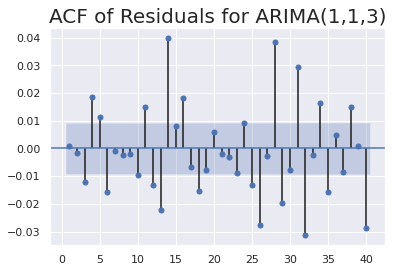

In [888]:
df['res_ar_1_i_1_ma_3'] = results_ar_1_i_1_ma_3.resid.iloc[:]
sgt.plot_acf(df.res_ar_1_i_1_ma_3[1:], zero=False, lags = 40)
plt.title('ACF of Residuals for ARIMA(1,1,3)', size=20)
plt.show()

In [889]:
model_ar_5_i_1_ma_1 = ARIMA(df.PM2, order=(5,1,1))
results_ar_5_i_1_ma_1 = model_ar_5_i_1_ma_1.fit()

model_ar_6_i_1_ma_3 = ARIMA(df.PM2, order=(6,1,3))
results_ar_6_i_1_ma_3 = model_ar_6_i_1_ma_3.fit()

In [890]:
print('\n ARMA (1,1,3): \tLL = ', results_ar_1_i_1_ma_3.llf, '\t AIC = ', results_ar_1_i_1_ma_3.aic)
print('\n ARMA (5,1,1): \tLL = ', results_ar_5_i_1_ma_1.llf, '\t AIC = ', results_ar_5_i_1_ma_1.aic)
print('\n ARMA (6,1,3): \tLL = ', results_ar_6_i_1_ma_3.llf, '\t AIC = ', results_ar_6_i_1_ma_3.aic)


 ARMA (1,1,3): 	LL =  -159005.5307335838 	 AIC =  318023.0614671676

 ARMA (5,1,1): 	LL =  -158992.9729719647 	 AIC =  318001.9459439294

 ARMA (6,1,3): 	LL =  -158921.83697910543 	 AIC =  317865.67395821086


In [891]:
print('\nLLR test p-value = ' + str(LLR_test(results_ar_1_i_1_ma_3, results_ar_6_i_1_ma_3, DF=5)))


LLR test p-value = 0.0


In [892]:
print('\nLLR test p-value = ' + str(LLR_test(results_ar_5_i_1_ma_1, results_ar_6_i_1_ma_3, DF=3)))


LLR test p-value = 0.0


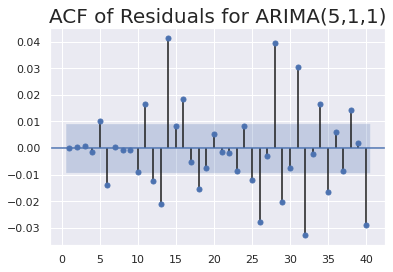

In [893]:
df['res_ar_5_i_1_ma_1'] = results_ar_5_i_1_ma_1.resid.iloc[:]
sgt.plot_acf(df.res_ar_5_i_1_ma_1[1:], zero=False, lags = 40)
plt.title('ACF of Residuals for ARIMA(5,1,1)', size=20)
plt.show()

Model with Higher Levels of Integration 

In [894]:
df['delta_changes'] = df.PM2.diff(1)

In [895]:
model_delta_ar_1_i_1_ma_1 = ARIMA(df.delta_changes[1:], order=(1,0,1))
results_delta_ar_1_i_1_ma_1 = model_delta_ar_1_i_1_ma_1.fit()
results_delta_ar_1_i_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:          delta_changes   No. Observations:                44839
Model:                     ARMA(1, 1)   Log Likelihood             -159164.021
Method:                       css-mle   S.D. of innovations              8.421
Date:                Wed, 24 Nov 2021   AIC                         318336.042
Time:                        01:08:55   BIC                         318370.886
Sample:                             0   HQIC                        318347.012
                                                                              
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0002      0.024      0.007      0.994      -0.047       0.047
ar.L1.delta_changes     0.6882      0.012     59.041      0.000       0.665       0.711
ma.L1.delta_changes    -0.8114      0.009    -86.803      0.000      -0.830      -0.793
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.4530           +0.0000j            1.4530            0.0000
MA.1            1.2325           +0.0000j            1.2325            0.0000
-----------------------------------------------------------------------------
"""

In [896]:
sts.adfuller(df.delta_changes[1:])

(-31.470704889346234,
 0.0,
 53,
 44785,
 {'1%': -3.430496023776992,
  '10%': -2.566804352187605,
  '5%': -2.8616045393448823},
 317147.30779394455)

In [897]:
model_ar_1_i_2_ma_1 = ARIMA(df.delta_changes[1:], order=(1,0,2))
results_ar_1_i_2_ma_1 = model_ar_1_i_2_ma_1.fit()
results_ar_1_i_2_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:          delta_changes   No. Observations:                44839
Model:                     ARMA(1, 2)   Log Likelihood             -159024.441
Method:                       css-mle   S.D. of innovations              8.395
Date:                Wed, 24 Nov 2021   AIC                         318058.883
Time:                        01:09:29   BIC                         318102.437
Sample:                             0   HQIC                        318072.595
                                                                              
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0002      0.026      0.007      0.994      -0.051       0.052
ar.L1.delta_changes     0.3807      0.027     13.888      0.000       0.327       0.434
ma.L1.delta_changes    -0.4626      0.027    -16.922      0.000      -0.516      -0.409
ma.L2.delta_changes    -0.1265      0.007    -18.998      0.000      -0.140      -0.113
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.6270           +0.0000j            2.6270            0.0000
MA.1            1.5254           +0.0000j            1.5254            0.0000
MA.2           -5.1821           +0.0000j            5.1821            0.5000
-----------------------------------------------------------------------------
"""

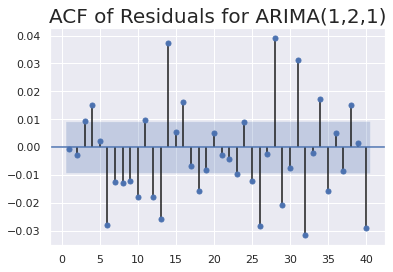

In [898]:
df['res_ar_1_i_2_ma_1'] = results_ar_1_i_2_ma_1.resid.iloc[:]
sgt.plot_acf(df.res_ar_1_i_2_ma_1[2:], zero=False, lags = 40)
plt.title('ACF of Residuals for ARIMA(1,2,1)', size=20)
plt.show()

ARIMAX

In [899]:
model_ar_1_i_1_ma_1.Xpm = ARIMA(df.PM2, exog = df.pm, order=(1,1,1))
results_ar_1_i_1_ma_1.Xpm = model_ar_1_i_1_ma_1.Xpm.fit()
results_ar_1_i_1_ma_1.Xpm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                  D.PM2   No. Observations:                44839
Model:                 ARIMA(1, 1, 1)   Log Likelihood             -159067.646
Method:                       css-mle   S.D. of innovations              8.403
Date:                Wed, 24 Nov 2021   AIC                         318145.292
Time:                        01:09:59   BIC                         318188.846
Sample:                             1   HQIC                        318159.005
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.4790      0.045    -10.641      0.000      -0.567      -0.391
pm              0.0091      0.001     12.894      0.000       0.008       0.010
ar.L1.D.PM2     0.6673      0.013     53.051      0.000       0.643       0.692
ma.L1.D.PM2    -0.7870      0.011    -74.125      0.000      -0.808      -0.766
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.4985           +0.0000j            1.4985            0.0000
MA.1            1.2706           +0.0000j            1.2706            0.0000
-----------------------------------------------------------------------------
"""

SARIMAX

In [900]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [901]:
model_sarimax = SARIMAX(df.PM2, exog=df.pm, order =(1,0,1), seasonal_order=(2,0,1,5))
results_sarimax = model_sarimax.fit()
results_sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                               PM2   No. Observations:                44840
Model:             SARIMAX(1, 0, 1)x(2, 0, 1, 5)   Log Likelihood              475024.069
Date:                           Wed, 24 Nov 2021   AIC                        -950034.137
Time:                                   01:10:54   BIC                        -949973.161
Sample:                                        0   HQIC                       -950014.939
                                         - 44840                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
pm             1.0000    8.4e-24   1.19e+23      0.000       1.000       1.000
ar.L1          0.9916   5.55e-23   1.79e+22      0.000       0.992       0.992
ma.L1         -0.2000   4.27e-25  -4.68e+23      0.000      -0.200      -0.200
ar.S.L5        0.8160   4.65e-23   1.75e+22      0.000       0.816       0.816
ar.S.L10       0.1596   4.63e-23   3.45e+21      0.000       0.160       0.160
ma.S.L5       -0.2761   2.37e-24  -1.16e+23      0.000      -0.276      -0.276
sigma2          1e-10   9.36e-12     10.685      0.000    8.17e-11    1.18e-10
===================================================================================
Ljung-Box (Q):                     5690.22   Jarque-Bera (JB):           4076428.04
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                             0.63
Prob(H) (two-sided):                  0.01   Kurtosis:                        49.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.03e+42. Standard errors may be unstable.
"""

Creating Returns for Volatility of ARCH Model

Creating Returns

In [902]:
df['returns'] = df.PM2.pct_change(1)*100

Creating Squared Returns

In [903]:
df['sq_returns'] = df.returns.mul(df.returns)

Returns vs Squared Returns

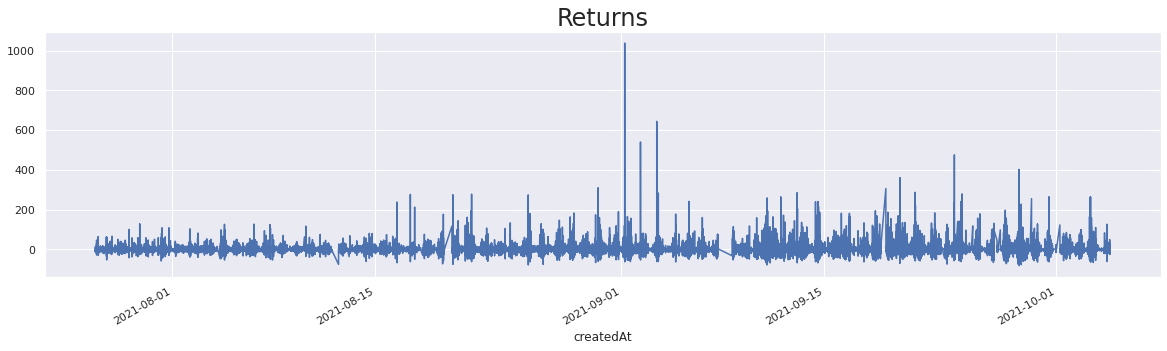

In [904]:
df.returns.plot(figsize=(20,5))
plt.title('Returns', size=24)
plt.show()

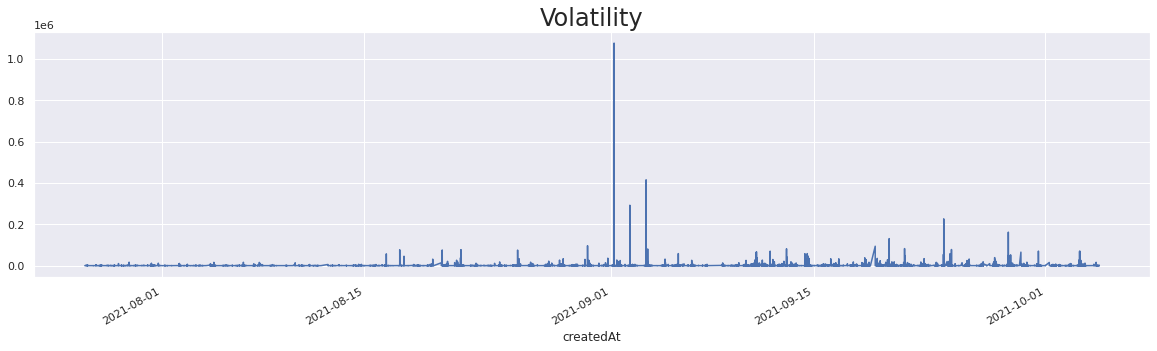

In [905]:
df.sq_returns.plot(figsize=(20,5))
plt.title('Volatility', size=24)
plt.show()

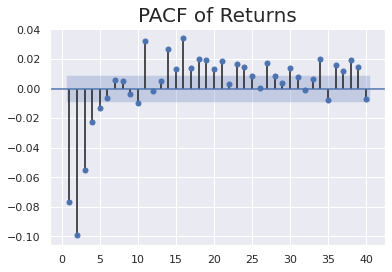

In [906]:
sgt.plot_pacf(df.returns[1:], alpha=0.05, lags=40, zero=False, method=('ols'))
plt.title('PACF of Returns', size=20)
plt.show()

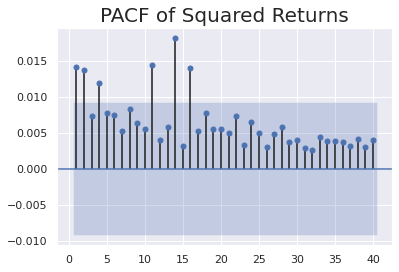

In [907]:
sgt.plot_pacf(df.sq_returns[1:], alpha=0.05, lags=40, zero=False, method=('ols'))
plt.title('PACF of Squared Returns', size=20)
plt.show()

The arch_model() Method

In [908]:

!pip install arch
from arch import arch_model

In [909]:
model_arch_1 = arch_model(df.returns[1:])
results_arch_1 = model_arch_1.fit(update_freq=5)
results_arch_1.summary()

Iteration:      5,   Func. Count:     38,   Neg. LLF: 183832.9140384676
Iteration:     10,   Func. Count:     78,   Neg. LLF: 183624.45465393877
Iteration:     15,   Func. Count:    120,   Neg. LLF: 183554.59999841845
Iteration:     20,   Func. Count:    159,   Neg. LLF: 183358.43632865354
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 183357.74022751034
            Iterations: 25
            Function evaluations: 167
            Gradient evaluations: 21


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -183358.
Distribution:                  Normal   AIC:                           366723.
Method:            Maximum Likelihood   BIC:                           366758.
                                        No. Observations:                44839
Date:                Wed, Nov 24 2021   Df Residuals:                    44838
Time:                        01:11:03   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.9848      1.570      0.627      0.530 [ -2.092,  4.062]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          4.7921     36.693      0.131      0.896    [-67.125, 76.710]
alpha[1]       0.0997      0.297      0.336      0.737    [ -0.483,  0.682]
beta[1]        0.8928      0.464      1.925  5.417e-02 [-1.600e-02,  1.802]
===========================================================================

Covariance estimator: robust
"""

The Simple ARCH(1)

In [910]:
model_arch_1 = arch_model(df.returns[1:], mean='Constant', vol='ARCH', p=1)
results_arch_1 = model_arch_1.fit(update_freq=5)
results_arch_1.summary()

Iteration:      5,   Func. Count:     28,   Neg. LLF: 190935.80049263217
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 190935.6772582035
            Iterations: 7
            Function evaluations: 49
            Gradient evaluations: 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -190936.
Distribution:                  Normal   AIC:                           381877.
Method:            Maximum Likelihood   BIC:                           381903.
                                        No. Observations:                44839
Date:                Wed, Nov 24 2021   Df Residuals:                    44838
Time:                        01:11:03   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             1.0472      0.314      3.333  8.596e-04 [  0.431,  1.663]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega        182.2715     24.956      7.304  2.800e-13 [1.334e+02,2.312e+02]
alpha[1]       1.0000      0.213      4.689  2.746e-06     [  0.582,  1.418]
============================================================================

Covariance estimator: robust
"""

In [911]:
model_arch_1 = arch_model(df.returns[1:], mean='AR', lags=[2,3,6], vol='ARCH', p=1, dist='ged')
results_arch_1 = model_arch_1.fit(update_freq=5)
results_arch_1.summary()

Iteration:      5,   Func. Count:     67,   Neg. LLF: 181406.76536318974
Iteration:     10,   Func. Count:    116,   Neg. LLF: 173294.3683775149
Iteration:     15,   Func. Count:    164,   Neg. LLF: 172820.48598663526
Iteration:     20,   Func. Count:    213,   Neg. LLF: 172820.31129377297
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 172820.31111507225
            Iterations: 24
            Function evaluations: 254
            Gradient evaluations: 22


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 AR - ARCH Model Results                                  
==========================================================================================
Dep. Variable:                            returns   R-squared:                       0.003
Mean Model:                                    AR   Adj. R-squared:                  0.003
Vol Model:                                   ARCH   Log-Likelihood:               -172820.
Distribution:      Generalized Error Distribution   AIC:                           345655.
Method:                        Maximum Likelihood   BIC:                           345716.
                                                    No. Observations:                44833
Date:                            Wed, Nov 24 2021   Df Residuals:                    44829
Time:                                    01:11:06   Df Model:                            4
                                   Mean Model                                  
===============================================================================
                  coef    std err          t      P>|t|        95.0% Conf. Int.
-------------------------------------------------------------------------------
Const       3.0923e-03      0.266  1.165e-02      0.991       [ -0.517,  0.524]
returns[2]     -0.0656  6.841e-03     -9.584  9.353e-22 [-7.897e-02,-5.215e-02]
returns[3]     -0.0154  9.325e-04    -16.489  4.373e-61 [-1.720e-02,-1.355e-02]
returns[6] -4.9393e-03  8.051e-03     -0.613      0.540  [-2.072e-02,1.084e-02]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega         72.4333      2.110     34.327 3.064e-258 [ 68.298, 76.569]
alpha[1]       1.0000  3.679e-02     27.182 1.063e-162 [  0.928,  1.072]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
nu             1.0100  2.566e-02     39.360      0.000 [  0.960,  1.060]
========================================================================

Covariance estimator: robust
"""

Higher-Lag ARCH Models

In [912]:
model_arch_2 = arch_model(df.returns[1:], mean='Constant', vol='ARCH', p=1)
results_arch_2 = model_arch_2.fit(update_freq=5)
results_arch_2.summary()

Iteration:      5,   Func. Count:     28,   Neg. LLF: 190935.80049263217
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 190935.6772582035
            Iterations: 7
            Function evaluations: 49
            Gradient evaluations: 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -190936.
Distribution:                  Normal   AIC:                           381877.
Method:            Maximum Likelihood   BIC:                           381903.
                                        No. Observations:                44839
Date:                Wed, Nov 24 2021   Df Residuals:                    44838
Time:                        01:11:07   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             1.0472      0.314      3.333  8.596e-04 [  0.431,  1.663]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega        182.2715     24.956      7.304  2.800e-13 [1.334e+02,2.312e+02]
alpha[1]       1.0000      0.213      4.689  2.746e-06     [  0.582,  1.418]
============================================================================

Covariance estimator: robust
"""

In [913]:
model_arch_3 = arch_model(df.returns[1:], mean='Constant', vol='ARCH', p=1)
results_arch_3 = model_arch_3.fit(update_freq=5)
results_arch_3.summary()

Iteration:      5,   Func. Count:     28,   Neg. LLF: 190935.80049263217
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 190935.6772582035
            Iterations: 7
            Function evaluations: 49
            Gradient evaluations: 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -190936.
Distribution:                  Normal   AIC:                           381877.
Method:            Maximum Likelihood   BIC:                           381903.
                                        No. Observations:                44839
Date:                Wed, Nov 24 2021   Df Residuals:                    44838
Time:                        01:11:08   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             1.0472      0.314      3.333  8.596e-04 [  0.431,  1.663]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega        182.2715     24.956      7.304  2.800e-13 [1.334e+02,2.312e+02]
alpha[1]       1.0000      0.213      4.689  2.746e-06     [  0.582,  1.418]
============================================================================

Covariance estimator: robust
"""

The Simple GARCH Model

In [914]:
model_garch_1_1 = arch_model(df.returns[1:], mean='Constant', vol='GARCH', p=1, q=1)
results_garch_1_1 = model_garch_1_1.fit(update_freq=5)
results_garch_1_1.summary()

Iteration:      5,   Func. Count:     38,   Neg. LLF: 183832.9140384676
Iteration:     10,   Func. Count:     78,   Neg. LLF: 183624.45465393877
Iteration:     15,   Func. Count:    120,   Neg. LLF: 183554.59999841845
Iteration:     20,   Func. Count:    159,   Neg. LLF: 183358.43632865354
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 183357.74022751034
            Iterations: 25
            Function evaluations: 167
            Gradient evaluations: 21


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -183358.
Distribution:                  Normal   AIC:                           366723.
Method:            Maximum Likelihood   BIC:                           366758.
                                        No. Observations:                44839
Date:                Wed, Nov 24 2021   Df Residuals:                    44838
Time:                        01:11:08   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.9848      1.570      0.627      0.530 [ -2.092,  4.062]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          4.7921     36.693      0.131      0.896    [-67.125, 76.710]
alpha[1]       0.0997      0.297      0.336      0.737    [ -0.483,  0.682]
beta[1]        0.8928      0.464      1.925  5.417e-02 [-1.600e-02,  1.802]
===========================================================================

Covariance estimator: robust
"""

Higher-Lag GARCH Models

In [915]:
model_garch_1_2 = arch_model(df.returns[1:], mean='Constant', vol='GARCH', p=1, q=2)
results_garch_1_2 = model_garch_1_2.fit(update_freq=5)
results_garch_1_2.summary()

Iteration:      5,   Func. Count:     45,   Neg. LLF: 183488.2887545308
Iteration:     10,   Func. Count:     86,   Neg. LLF: 183122.5970660975
Iteration:     15,   Func. Count:    123,   Neg. LLF: 182913.39671106165
Iteration:     20,   Func. Count:    160,   Neg. LLF: 182951.68477015826
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 182951.68515187717
            Iterations: 25
            Function evaluations: 168
            Gradient evaluations: 21


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -182952.
Distribution:                  Normal   AIC:                           365913.
Method:            Maximum Likelihood   BIC:                           365957.
                                        No. Observations:                44839
Date:                Wed, Nov 24 2021   Df Residuals:                    44838
Time:                        01:11:09   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.8462      0.131      6.443  1.169e-10 [  0.589,  1.104]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          4.2643      3.450      1.236      0.216    [ -2.498, 11.027]
alpha[1]       0.1167  2.795e-02      4.174  2.989e-05  [6.190e-02,  0.171]
beta[1]        0.4994      0.285      1.752  7.972e-02 [-5.918e-02,  1.058]
beta[2]        0.3839      0.245      1.568      0.117 [-9.587e-02,  0.864]
===========================================================================

Covariance estimator: robust
"""

In [916]:
model_garch_1_3 = arch_model(df.returns[1:], mean='Constant', vol='GARCH', p=1, q=3)
results_garch_1_3 = model_garch_1_3.fit(update_freq=5)
results_garch_1_3.summary()

Iteration:      5,   Func. Count:     48,   Neg. LLF: 183120.5496225041
Iteration:     10,   Func. Count:     95,   Neg. LLF: 182859.85098613836
Iteration:     15,   Func. Count:    142,   Neg. LLF: 182780.46514672303
Iteration:     20,   Func. Count:    193,   Neg. LLF: 182639.21017272281
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 182656.81534663506
            Iterations: 28
            Function evaluations: 226
            Gradient evaluations: 24


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -182657.
Distribution:                  Normal   AIC:                           365326.
Method:            Maximum Likelihood   BIC:                           365378.
                                        No. Observations:                44839
Date:                Wed, Nov 24 2021   Df Residuals:                    44838
Time:                        01:11:10   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.8417      0.141      5.966  2.437e-09 [  0.565,  1.118]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          6.2155      3.662      1.697  8.966e-02   [ -0.962, 13.393]
alpha[1]       0.1746  3.303e-02      5.286  1.252e-07   [  0.110,  0.239]
beta[1]        0.2775  9.163e-02      3.029  2.457e-03 [9.792e-02,  0.457]
beta[2]        0.0000      0.331      0.000      1.000   [ -0.650,  0.650]
beta[3]        0.5479      0.272      2.012  4.424e-02 [1.412e-02,  1.082]
==========================================================================

Covariance estimator: robust
"""

In [917]:
model_garch_2_1 = arch_model(df.returns[1:], mean='Constant', vol='GARCH', p=2, q=1)
results_garch_2_1 = model_garch_2_1.fit(update_freq=5)
results_garch_2_1.summary()

Iteration:      5,   Func. Count:     45,   Neg. LLF: 184118.18732300855
Iteration:     10,   Func. Count:     89,   Neg. LLF: 182998.45104876976
Iteration:     15,   Func. Count:    141,   Neg. LLF: 183056.62485136243
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: 183053.19687052543
            Iterations: 21
            Function evaluations: 156
            Gradient evaluations: 17


/usr/local/lib/python3.7/dist-packages/arch/univariate/base.py:755: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -183053.
Distribution:                  Normal   AIC:                           366116.
Method:            Maximum Likelihood   BIC:                           366160.
                                        No. Observations:                44839
Date:                Wed, Nov 24 2021   Df Residuals:                    44838
Time:                        01:11:11   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.8770      0.165      5.328  9.949e-08 [  0.554,  1.200]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          3.1797      2.514      1.265      0.206      [ -1.747,  8.106]
alpha[1]       0.0851  2.034e-02      4.185  2.853e-05    [4.525e-02,  0.125]
alpha[2]       0.0000  3.363e-02      0.000      1.000 [-6.592e-02,6.592e-02]
beta[1]        0.9149  3.242e-02     28.216 3.697e-175      [  0.851,  0.978]
=============================================================================

Covariance estimator: robust
WARNING: The optimizer did not indicate successful convergence. The message was Positive directional derivative for linesearch.
See convergence_flag.

"""

In [918]:
model_garch_3_1 = arch_model(df.returns[1:], mean='Constant', vol='GARCH', p=3, q=1)
results_garch_3_1 = model_garch_3_1.fit(update_freq=5)
results_garch_3_1.summary()

Iteration:      5,   Func. Count:     48,   Neg. LLF: 183574.81110373363
Iteration:     10,   Func. Count:     98,   Neg. LLF: 183434.02150534146
Iteration:     15,   Func. Count:    149,   Neg. LLF: 183292.59869795834
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 183292.5992248426
            Iterations: 19
            Function evaluations: 149
            Gradient evaluations: 15


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -183293.
Distribution:                  Normal   AIC:                           366597.
Method:            Maximum Likelihood   BIC:                           366649.
                                        No. Observations:                44839
Date:                Wed, Nov 24 2021   Df Residuals:                    44838
Time:                        01:11:12   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.9154      0.947      0.966      0.334 [ -0.941,  2.772]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          4.2426     25.816      0.164      0.869   [-46.357, 54.842]
alpha[1]       0.0770  2.511e-02      3.068  2.154e-03 [2.783e-02,  0.126]
alpha[2]       0.0113  5.679e-02      0.199      0.842   [ -0.100,  0.123]
alpha[3]       0.0113      0.264  4.262e-02      0.966   [ -0.507,  0.529]
beta[1]        0.8979      0.366      2.450  1.428e-02   [  0.180,  1.616]
==========================================================================

Covariance estimator: robust
"""